<a href="https://colab.research.google.com/github/dscroft/wm9QF_programming_for_artificial_intelligence_labs/blob/main/CUDA_%26_GPU_Programming_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Dec  8 23:06:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 🚀 Module Week 4: Accelerating Python Data Mining with GPUs

## 📝 STUDENT VERSION - Exercises with Scaffolding

---

## Workshop Overview

**Course:** Advanced Data Mining & Analytics  
**Module:** Week 4 - GPU-Accelerated Computing  
**Environment:** Google Colab (T4 GPU - Free Tier)  
**Duration:** ~2 hours hands-on

**📌 NOTE:** This is the **STUDENT VERSION** with exercise scaffolding.
Look for cells marked with **🏋️ EXERCISE** to complete the hands-on activities.

---

### 🎯 Learning Objectives

By the end of this workshop, you will be able to:

1. **Explain** the fundamental differences between CPU and GPU architectures
2. **Benchmark** and quantify GPU speedups on real data operations
3. **Write** basic CUDA kernels using Numba, understanding threads, blocks, and grids
4. **Apply** RAPIDS cuDF for production-grade GPU-accelerated data mining

---

### ⚠️ CRITICAL: Before You Begin

**YOU MUST ENABLE GPU RUNTIME BEFORE RUNNING ANY CODE!**

1. Go to **Runtime** → **Change runtime type**
2. Select **T4 GPU** under "Hardware accelerator"
3. Click **Save**

**If you skip this step, ALL GPU code will fail with cryptic errors!**

---

### 📋 Prerequisites

- Basic Python proficiency (NumPy, Pandas)
- Understanding of fundamental data structures
- Familiarity with Jupyter/Colab environment

---

## 🔧 Section 0: Environment Setup & Validation

This section ensures your environment is correctly configured. **Run each cell sequentially and verify the outputs.**

### 0.1 GPU Hardware Verification

**Expected Output:** You should see information about an NVIDIA T4 GPU with ~15GB memory.  
**If you see "No devices found" or an error:** You forgot to enable GPU runtime!

In [ ]:
# =============================================================================
# CELL 0.1: GPU HARDWARE VERIFICATION
# =============================================================================
# This cell MUST run successfully before proceeding.
# If this fails, you have NOT enabled GPU runtime!
# =============================================================================

import subprocess
import sys

print("=" * 70)
print("GPU HARDWARE VERIFICATION")
print("=" * 70)

try:
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True, check=True)
    print(result.stdout)

    # Parse GPU name for validation
    if 'T4' in result.stdout:
        print("✅ SUCCESS: NVIDIA T4 GPU detected! You are ready to proceed.")
    elif 'Tesla' in result.stdout or 'A100' in result.stdout or 'V100' in result.stdout:
        print("✅ SUCCESS: NVIDIA GPU detected (different model). Proceeding...")
    else:
        print("⚠️  WARNING: GPU detected but not T4. Results may vary.")

except subprocess.CalledProcessError:
    print("❌ CRITICAL ERROR: nvidia-smi failed!")
    print("   This means NO GPU is available.")
    print("")
    print("   FIX: Go to Runtime → Change runtime type → Select 'T4 GPU' → Save")
    print("   Then restart the runtime and run this cell again.")
    sys.exit(1)
except FileNotFoundError:
    print("❌ CRITICAL ERROR: nvidia-smi not found!")
    print("   You are likely not running on Google Colab or GPU is not enabled.")
    sys.exit(1)

print("=" * 70)

GPU HARDWARE VERIFICATION
Mon Dec  8 23:06:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+---------------------

### 0.2 Install RAPIDS cuDF Library

**⚠️ IMPORTANT:** This installation takes 2-5 minutes. Be patient!

**⚠️ RESTART REQUIRED:** After this cell completes successfully, you **MUST** restart the runtime:
- Go to **Runtime** → **Restart runtime** (or press Ctrl+M, then .)
- Do NOT re-run the installation cell after restarting
- Continue from Section 0.3

**Why pip instead of conda?** Google Colab's environment is pre-configured. The pip installation method is now the officially recommended approach for Colab and avoids the complex conda environment issues that plagued earlier RAPIDS installations.

In [ ]:
# =============================================================================
# CELL 0.2: INSTALL RAPIDS cuDF (GPU-ACCELERATED DATAFRAMES)
# =============================================================================
# This is the OFFICIAL pip installation method for RAPIDS on Colab.
# DO NOT use conda - it will cause environment conflicts on Colab!
# =============================================================================

print("=" * 70)
print("INSTALLING RAPIDS cuDF - THIS WILL TAKE 2-5 MINUTES")
print("=" * 70)
print("")
print("☕ Grab a coffee while this installs...")
print("")

# Install cuDF using the official NVIDIA PyPI index
# The --extra-index-url points to NVIDIA's package repository
# cu12 = CUDA 12.x compatibility (matches Colab's CUDA version)
!pip install --quiet cudf-cu12 --extra-index-url=https://pypi.nvidia.com

print("")
print("=" * 70)
print("✅ INSTALLATION COMPLETE!")
print("=" * 70)
print("")
print("⚠️  CRITICAL NEXT STEP:")
print("   You MUST restart the runtime NOW!")
print("")
print("   Go to: Runtime → Restart runtime")
print("   OR press: Ctrl+M, then . (period)")
print("")
print("   After restart, SKIP this cell and continue from Section 0.3")
print("=" * 70)

INSTALLING RAPIDS cuDF - THIS WILL TAKE 2-5 MINUTES

☕ Grab a coffee while this installs...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 209.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 131.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.9.0+cu126 requires nvidia-cuda-nvrtc-cu12==12.6.77; platform_system == "Linux", but you have nvidia-cuda-nvrtc-cu12 12.9.86 which is incompatible.

✅ INSTALLATION COMPLETE!

⚠️  CRITICAL NEXT STEP:
   You MUST restart the runtime NOW!

   Go to: Runtime → Restart runtime
   OR press: Ctrl+M, then . (period)

   After restart, SKIP this cell and continue from Section 0.3


### 0.3 Verify Installation & Import Libraries

**Run this cell AFTER restarting the runtime.**

If you see import errors for `cudf`, you either:
1. Did not restart the runtime after installation, OR
2. The installation failed (scroll up to check for errors)

In [ ]:
# =============================================================================
# CELL 0.3: IMPORT ALL REQUIRED LIBRARIES
# =============================================================================
# Run this cell AFTER restarting the runtime (if you installed cuDF above).
# =============================================================================

import warnings
warnings.filterwarnings('ignore')  # Suppress deprecation warnings for cleaner output

# -----------------------------------------------------------------------------
# Standard Python Libraries
# -----------------------------------------------------------------------------
import numpy as np                    # Numerical computing
import pandas as pd                   # CPU-based DataFrames
import time                           # Timing measurements
import gc                             # Garbage collection for memory management
import sys                            # System information

# -----------------------------------------------------------------------------
# Visualization Libraries
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt       # Core plotting library
import matplotlib.patches as mpatches # For custom legend patches
from matplotlib.colors import LinearSegmentedColormap

# Configure matplotlib for clean, professional plots
plt.style.use('seaborn-v0_8-whitegrid')  # Clean style with grid
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 100

# Define consistent color palette for CPU vs GPU comparisons
COLORS = {
    'cpu': '#3498db',        # Blue for CPU
    'gpu': '#e74c3c',        # Red for GPU
    'gpu_transfer': '#f39c12',  # Orange for GPU transfer time
    'gpu_compute': '#27ae60',   # Green for GPU compute time
    'neutral': '#95a5a6',    # Gray for neutral elements
    'highlight': '#9b59b6',  # Purple for highlights
    'success': '#2ecc71',    # Green for success
    'warning': '#f1c40f',    # Yellow for warnings
}

print("✅ Visualization libraries configured")

# -----------------------------------------------------------------------------
# GPU Libraries
# -----------------------------------------------------------------------------
try:
    import cudf                       # GPU-accelerated DataFrames (RAPIDS)
    CUDF_AVAILABLE = True
    print(f"✅ cuDF version: {cudf.__version__}")
except ImportError as e:
    CUDF_AVAILABLE = False
    print(f"❌ cuDF import failed: {e}")
    print("   Did you run the installation cell and restart the runtime?")

try:
    from numba import cuda            # CUDA kernel programming
    import numba
    NUMBA_AVAILABLE = True
    print(f"✅ Numba version: {numba.__version__}")
except ImportError as e:
    NUMBA_AVAILABLE = False
    print(f"❌ Numba import failed: {e}")

# -----------------------------------------------------------------------------
# Verify CUDA is accessible
# -----------------------------------------------------------------------------
if NUMBA_AVAILABLE:
    try:
        # This will fail if no GPU is available
        cuda.detect()
        device = cuda.get_current_device()
        print(f"✅ CUDA device: {device.name.decode('utf-8')}")
        print(f"   Compute capability: {device.compute_capability}")

        # Get memory info
        free_mem, total_mem = cuda.current_context().get_memory_info()
        print(f"   GPU Memory: {free_mem / 1e9:.2f} GB free / {total_mem / 1e9:.2f} GB total")
    except Exception as e:
        print(f"❌ CUDA detection failed: {e}")
        print("   Make sure GPU runtime is enabled!")

# -----------------------------------------------------------------------------
# Set random seed for reproducibility
# -----------------------------------------------------------------------------
np.random.seed(42)
print("")
print("✅ All libraries imported successfully!")
print("=" * 70)

✅ Visualization libraries configured
✅ cuDF version: 25.10.00
✅ Numba version: 0.60.0
Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-51cad1cd-f90b-99c4-8bf6-cd1c64a5263b
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
✅ CUDA device: Tesla T4
   Compute capability: (7, 5)
❌ CUDA detection failed: 
   Make sure GPU runtime is enabled!

✅ All libraries imported successfully!


---

## 📊 Part 1: The "Why" - Benchmarking CPU vs. GPU

### Motivation

Before diving into *how* GPUs work, let's see *why* we should care. We'll perform identical operations on CPU (Pandas) and GPU (cuDF) and measure the difference.

**Key Insight:** GPUs excel at **throughput** - doing many simple operations simultaneously. CPUs excel at **latency** - doing one complex operation quickly.

**Analogy:**
- **CPU** = Ferrari 🏎️ - Very fast for one passenger, but can only carry 1-2 people
- **GPU** = Bus 🚌 - Slower per trip, but carries 50+ people simultaneously

For data mining with millions of rows, we need the bus!

### 1.1 Generate Synthetic Dataset

We'll create a realistic e-commerce transaction dataset with 10 million rows. This ensures:
1. **Reproducibility** - No external file dependencies
2. **Scale** - Large enough to see meaningful speedups
3. **Realism** - Multiple data types (int, float, string, datetime)

In [ ]:
# =============================================================================
# CELL 1.1: GENERATE SYNTHETIC E-COMMERCE DATASET
# =============================================================================
# We generate data programmatically to ensure:
# 1. No file upload dependencies (Colab-friendly)
# 2. Exact reproducibility across runs
# 3. Controlled memory footprint
# =============================================================================

print("=" * 70)
print("GENERATING SYNTHETIC DATASET")
print("=" * 70)

# -----------------------------------------------------------------------------
# Configuration - Adjust N_ROWS if you encounter memory issues
# -----------------------------------------------------------------------------
N_ROWS = 10_000_000  # 10 million rows
N_CUSTOMERS = 100_000  # 100k unique customers
N_PRODUCTS = 5_000     # 5k unique products
N_CATEGORIES = 50      # 50 product categories

print(f"Target rows: {N_ROWS:,}")
print(f"Unique customers: {N_CUSTOMERS:,}")
print(f"Unique products: {N_PRODUCTS:,}")
print("")

# -----------------------------------------------------------------------------
# Generate data using NumPy (fast!)
# -----------------------------------------------------------------------------
print("Generating columns...")

start_time = time.time()

# Transaction IDs (sequential)
transaction_ids = np.arange(1, N_ROWS + 1, dtype=np.int64)
print("  ✓ transaction_ids")

# Customer IDs (random selection from pool)
customer_ids = np.random.randint(1, N_CUSTOMERS + 1, size=N_ROWS, dtype=np.int32)
print("  ✓ customer_ids")

# Product IDs (random selection from pool)
product_ids = np.random.randint(1, N_PRODUCTS + 1, size=N_ROWS, dtype=np.int32)
print("  ✓ product_ids")

# Category IDs (derived from product ID for consistency)
# In real data, products map to categories; we simulate this
category_ids = (product_ids % N_CATEGORIES) + 1
print("  ✓ category_ids")

# Quantities (1-10 items per transaction)
quantities = np.random.randint(1, 11, size=N_ROWS, dtype=np.int16)
print("  ✓ quantities")

# Unit prices ($0.99 to $999.99, log-normal distribution for realism)
# Log-normal gives more low prices, fewer high prices (like real retail)
unit_prices = np.round(np.random.lognormal(mean=3.0, sigma=1.0, size=N_ROWS), 2)
unit_prices = np.clip(unit_prices, 0.99, 999.99).astype(np.float32)
print("  ✓ unit_prices")

# Discount percentages (0%, 5%, 10%, 15%, 20%, 25% - realistic promo values)
discount_options = np.array([0.0, 0.05, 0.10, 0.15, 0.20, 0.25], dtype=np.float32)
discounts = np.random.choice(discount_options, size=N_ROWS)
print("  ✓ discounts")

# Region (categorical - 5 regions)
regions = np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=N_ROWS)
print("  ✓ regions")

# -----------------------------------------------------------------------------
# Create Pandas DataFrame
# -----------------------------------------------------------------------------
print("")
print("Creating Pandas DataFrame...")

df_pandas = pd.DataFrame({
    'transaction_id': transaction_ids,
    'customer_id': customer_ids,
    'product_id': product_ids,
    'category_id': category_ids,
    'quantity': quantities,
    'unit_price': unit_prices,
    'discount': discounts,
    'region': regions
})

# Add computed column: total_amount = quantity * unit_price * (1 - discount)
df_pandas['total_amount'] = (
    df_pandas['quantity'] *
    df_pandas['unit_price'] *
    (1 - df_pandas['discount'])
).astype(np.float32)

elapsed = time.time() - start_time

# -----------------------------------------------------------------------------
# Report memory usage
# -----------------------------------------------------------------------------
memory_mb = df_pandas.memory_usage(deep=True).sum() / 1e6

print("")
print("=" * 70)
print(f"✅ Dataset created in {elapsed:.2f} seconds")
print(f"   Shape: {df_pandas.shape[0]:,} rows × {df_pandas.shape[1]} columns")
print(f"   Memory usage: {memory_mb:.1f} MB")
print("=" * 70)
print("")
print("Sample data:")
print(df_pandas.head(10).to_string())
print("")
print("Data types:")
print(df_pandas.dtypes)

GENERATING SYNTHETIC DATASET
Target rows: 10,000,000
Unique customers: 100,000
Unique products: 5,000

Generating columns...
  ✓ transaction_ids
  ✓ customer_ids
  ✓ product_ids
  ✓ category_ids
  ✓ quantities
  ✓ unit_prices
  ✓ discounts
  ✓ regions

Creating Pandas DataFrame...

✅ Dataset created in 2.56 seconds
   Shape: 10,000,000 rows × 9 columns
   Memory usage: 880.0 MB

Sample data:
   transaction_id  customer_id  product_id  category_id  quantity  unit_price  discount   region  total_amount
0               1        15796        3460           11         2    5.520000      0.00     West     11.040000
1               2          861        1094           45         8    1.760000      0.15     West     11.968000
2               3        76821        3613           14         5   37.790001      0.05    South    179.502502
3               4        54887        1891           42         4   23.820000      0.05     West     90.515999
4               5         6266        1500        

### 1.2 Benchmark: Sorting (CPU vs. GPU)

**Operation:** Sort 10 million rows by `total_amount` column.

**Why sorting?** Sorting is a fundamental operation in:
- Ranking algorithms
- Top-K queries ("Top 100 customers")
- Merge operations in joins
- Many data mining preprocessing steps

**Expected Result:** GPU should be 10-50x faster for this operation.

In [ ]:
# =============================================================================
# CELL 1.2: BENCHMARK - SORTING COMPARISON
# =============================================================================
# We compare the same sorting operation on CPU (Pandas) vs. GPU (cuDF).
# Multiple runs are performed to get stable timing measurements.
# =============================================================================

print("=" * 70)
print("BENCHMARK: SORTING 10 MILLION ROWS")
print("=" * 70)
print("")

NUM_RUNS = 3  # Multiple runs for stable measurement

# -----------------------------------------------------------------------------
# CPU BENCHMARK (Pandas)
# -----------------------------------------------------------------------------
print("🔷 CPU (Pandas) - Sorting by total_amount...")
print(f"   Running {NUM_RUNS} iterations...")

cpu_times = []
for i in range(NUM_RUNS):
    # Force garbage collection before timing
    gc.collect()

    start = time.time()
    df_sorted_cpu = df_pandas.sort_values('total_amount', ascending=False)
    end = time.time()

    cpu_times.append(end - start)
    print(f"   Run {i+1}: {cpu_times[-1]:.3f} seconds")

    # Clean up to free memory
    del df_sorted_cpu
    gc.collect()

cpu_avg = np.mean(cpu_times)
print(f"   Average: {cpu_avg:.3f} seconds")
print("")

# -----------------------------------------------------------------------------
# GPU BENCHMARK (cuDF)
# -----------------------------------------------------------------------------
print("🔶 GPU (cuDF) - Sorting by total_amount...")

if not CUDF_AVAILABLE:
    print("   ❌ cuDF not available - skipping GPU benchmark")
    gpu_avg = None
else:
    # First, transfer data from CPU (Host) to GPU (Device)
    print("   Transferring data to GPU...")
    transfer_start = time.time()
    df_cudf = cudf.DataFrame.from_pandas(df_pandas)
    transfer_time = time.time() - transfer_start
    print(f"   Transfer time: {transfer_time:.3f} seconds")
    print("")

    print(f"   Running {NUM_RUNS} iterations...")
    gpu_times = []

    for i in range(NUM_RUNS):
        # Synchronize GPU before timing (ensures previous operations complete)
        cuda.synchronize()

        start = time.time()
        df_sorted_gpu = df_cudf.sort_values('total_amount', ascending=False)
        # CRITICAL: Synchronize after operation to ensure it's complete
        # GPU operations are asynchronous - without this, timing is wrong!
        cuda.synchronize()
        end = time.time()

        gpu_times.append(end - start)
        print(f"   Run {i+1}: {gpu_times[-1]:.3f} seconds")

        del df_sorted_gpu

    gpu_avg = np.mean(gpu_times)
    print(f"   Average: {gpu_avg:.3f} seconds")

# -----------------------------------------------------------------------------
# RESULTS COMPARISON
# -----------------------------------------------------------------------------
print("")
print("=" * 70)
print("📊 RESULTS SUMMARY")
print("=" * 70)
print(f"   CPU (Pandas) average: {cpu_avg:.3f} seconds")

if gpu_avg is not None:
    print(f"   GPU (cuDF) average:   {gpu_avg:.3f} seconds")
    speedup = cpu_avg / gpu_avg
    print("")
    print(f"   🚀 SPEEDUP: {speedup:.1f}x FASTER on GPU!")
    print("")
    if speedup > 20:
        print("   💡 This is a significant speedup! For iterative data mining")
        print("      algorithms that sort repeatedly, this compounds dramatically.")
else:
    print("   GPU benchmark skipped (cuDF not available)")
print("=" * 70)

BENCHMARK: SORTING 10 MILLION ROWS

🔷 CPU (Pandas) - Sorting by total_amount...
   Running 3 iterations...
   Run 1: 4.654 seconds
   Run 2: 5.150 seconds
   Run 3: 4.512 seconds
   Average: 4.772 seconds

🔶 GPU (cuDF) - Sorting by total_amount...
   Transferring data to GPU...
   Transfer time: 1.212 seconds

   Running 3 iterations...
   Run 1: 0.167 seconds
   Run 2: 0.087 seconds
   Run 3: 0.086 seconds
   Average: 0.114 seconds

📊 RESULTS SUMMARY
   CPU (Pandas) average: 4.772 seconds
   GPU (cuDF) average:   0.114 seconds

   🚀 SPEEDUP: 42.0x FASTER on GPU!

   💡 This is a significant speedup! For iterative data mining
      algorithms that sort repeatedly, this compounds dramatically.


📊 Generating Sorting Benchmark Visualization...



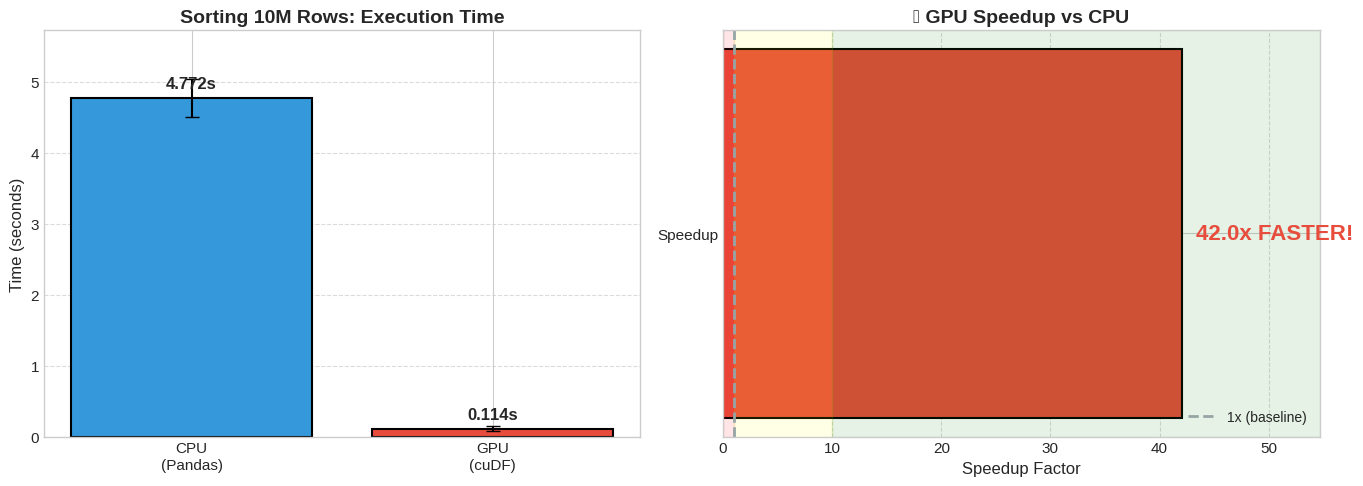


📊 INTERPRETATION
   🎯 EXCELLENT! 42.0x speedup is outstanding for this operation.
   This means a 1-hour CPU job would take ~3 minutes on GPU!


In [ ]:
# =============================================================================
# CELL 1.2b: VISUALIZE SORTING BENCHMARK RESULTS
# =============================================================================
# Let's make the results tangible with a clear visualization!
# =============================================================================

def create_benchmark_bar_chart(cpu_time, gpu_time, operation_name,
                                cpu_times_list=None, gpu_times_list=None):
    """
    Create a professional bar chart comparing CPU vs GPU performance.

    Parameters:
    -----------
    cpu_time : float - Average CPU time in seconds
    gpu_time : float - Average GPU time in seconds (or None if not available)
    operation_name : str - Name of the operation being compared
    cpu_times_list : list - Individual run times for error bars (optional)
    gpu_times_list : list - Individual run times for error bars (optional)
    """

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # -------------------------------------------------------------------------
    # LEFT PLOT: Direct Time Comparison (Bar Chart)
    # -------------------------------------------------------------------------
    ax1 = axes[0]

    if gpu_time is not None:
        categories = ['CPU\n(Pandas)', 'GPU\n(cuDF)']
        times = [cpu_time, gpu_time]
        colors = [COLORS['cpu'], COLORS['gpu']]

        # Calculate error bars if individual times provided
        if cpu_times_list and gpu_times_list:
            errors = [np.std(cpu_times_list), np.std(gpu_times_list)]
        else:
            errors = None
    else:
        categories = ['CPU\n(Pandas)', 'GPU\n(cuDF)']
        times = [cpu_time, 0]
        colors = [COLORS['cpu'], COLORS['neutral']]
        errors = None

    bars = ax1.bar(categories, times, color=colors, edgecolor='black', linewidth=1.5,
                   yerr=errors, capsize=5 if errors else 0)

    # Add value labels on bars
    for bar, time_val in zip(bars, times):
        if time_val > 0:
            ax1.annotate(f'{time_val:.3f}s',
                        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        xytext=(0, 5), textcoords='offset points',
                        ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax1.set_ylabel('Time (seconds)', fontsize=12)
    ax1.set_title(f'{operation_name}: Execution Time', fontsize=14, fontweight='bold')
    ax1.set_ylim(0, max(times) * 1.2)

    # Add grid for readability
    ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax1.set_axisbelow(True)

    # -------------------------------------------------------------------------
    # RIGHT PLOT: Speedup Visualization (Horizontal Bar with Arrow)
    # -------------------------------------------------------------------------
    ax2 = axes[1]

    if gpu_time is not None and gpu_time > 0:
        speedup = cpu_time / gpu_time

        # Create a more dramatic speedup visualization
        ax2.barh(['Speedup'], [speedup], color=COLORS['gpu'], edgecolor='black',
                 linewidth=1.5, height=0.5)

        # Add reference line at 1x (no speedup)
        ax2.axvline(x=1, color=COLORS['neutral'], linestyle='--', linewidth=2, label='1x (baseline)')

        # Add speedup annotation
        ax2.annotate(f'{speedup:.1f}x FASTER!',
                    xy=(speedup, 0),
                    xytext=(10, 0), textcoords='offset points',
                    ha='left', va='center', fontsize=16, fontweight='bold',
                    color=COLORS['gpu'])

        ax2.set_xlabel('Speedup Factor', fontsize=12)
        ax2.set_title('🚀 GPU Speedup vs CPU', fontsize=14, fontweight='bold')
        ax2.set_xlim(0, max(speedup * 1.3, 2))
        ax2.legend(loc='lower right')

        # Color zones for context
        ax2.axvspan(0, 1, alpha=0.1, color='red', label='GPU slower')
        ax2.axvspan(1, 10, alpha=0.1, color='yellow')
        ax2.axvspan(10, ax2.get_xlim()[1], alpha=0.1, color='green')

    else:
        ax2.text(0.5, 0.5, 'GPU benchmark\nnot available',
                ha='center', va='center', fontsize=14,
                transform=ax2.transAxes, color=COLORS['neutral'])
        ax2.set_title('GPU Speedup', fontsize=14, fontweight='bold')

    ax2.xaxis.grid(True, linestyle='--', alpha=0.7)
    ax2.set_axisbelow(True)

    plt.tight_layout()
    plt.show()

    # Print interpretation
    if gpu_time is not None and gpu_time > 0:
        print("\n" + "=" * 70)
        print("📊 INTERPRETATION")
        print("=" * 70)
        if speedup >= 20:
            print(f"   🎯 EXCELLENT! {speedup:.1f}x speedup is outstanding for this operation.")
            print("   This means a 1-hour CPU job would take ~3 minutes on GPU!")
        elif speedup >= 5:
            print(f"   ✅ GOOD! {speedup:.1f}x speedup shows clear GPU benefit.")
            print("   For iterative algorithms, this compounds significantly.")
        elif speedup >= 1:
            print(f"   ⚠️  MODEST: {speedup:.1f}x speedup. GPU is faster, but consider:")
            print("   - Is your data large enough?")
            print("   - Is this operation the bottleneck?")
        else:
            print(f"   ❌ GPU was SLOWER! This can happen with small datasets")
            print("   where transfer overhead dominates computation time.")
        print("=" * 70)

# Generate the visualization for sorting benchmark
print("📊 Generating Sorting Benchmark Visualization...")
print("")

create_benchmark_bar_chart(
    cpu_time=cpu_avg,
    gpu_time=gpu_avg,
    operation_name="Sorting 10M Rows",
    cpu_times_list=cpu_times,
    gpu_times_list=gpu_times if 'gpu_times' in dir() else None
)

### 1.3 Benchmark: GroupBy Aggregation (CPU vs. GPU)

**Operation:** Group by `customer_id` and compute total spending per customer.

**Why GroupBy?** This is the bread-and-butter of:
- Customer segmentation (RFM analysis)
- Feature engineering for ML models
- Report generation
- Anomaly detection (unusual spending patterns)

**Real-world scale:** With 100k customers and 10M transactions, this tests aggregation at realistic data mining scale.

In [ ]:
# =============================================================================
# CELL 1.3: BENCHMARK - GROUPBY AGGREGATION
# =============================================================================
# GroupBy is one of the most common operations in data mining.
# We compare Pandas vs. cuDF for a typical aggregation query.
# =============================================================================

print("=" * 70)
print("BENCHMARK: GROUPBY AGGREGATION")
print("=" * 70)
print("")
print("Query: For each customer, compute:")
print("  - Total transactions (count)")
print("  - Total spending (sum)")
print("  - Average order value (mean)")
print("")

NUM_RUNS = 3

# -----------------------------------------------------------------------------
# CPU BENCHMARK (Pandas)
# -----------------------------------------------------------------------------
print("🔷 CPU (Pandas) - GroupBy aggregation...")
print(f"   Running {NUM_RUNS} iterations...")

cpu_groupby_times = []
for i in range(NUM_RUNS):
    gc.collect()

    start = time.time()
    customer_stats_cpu = df_pandas.groupby('customer_id').agg({
        'transaction_id': 'count',
        'total_amount': ['sum', 'mean']
    })
    end = time.time()

    cpu_groupby_times.append(end - start)
    print(f"   Run {i+1}: {cpu_groupby_times[-1]:.3f} seconds")

    if i < NUM_RUNS - 1:  # Keep last result for verification
        del customer_stats_cpu
        gc.collect()

cpu_groupby_avg = np.mean(cpu_groupby_times)
print(f"   Average: {cpu_groupby_avg:.3f} seconds")
print(f"   Result shape: {customer_stats_cpu.shape}")
print("")

# -----------------------------------------------------------------------------
# GPU BENCHMARK (cuDF)
# -----------------------------------------------------------------------------
print("🔶 GPU (cuDF) - GroupBy aggregation...")

if not CUDF_AVAILABLE:
    print("   ❌ cuDF not available - skipping GPU benchmark")
    gpu_groupby_avg = None
else:
    # Ensure df_cudf exists (from previous cell) or recreate
    # Using try/except is more reliable than 'in dir()' in notebook environments
    try:
        _ = df_cudf  # Check if variable exists
    except NameError:
        print("   Transferring data to GPU...")
        df_cudf = cudf.DataFrame.from_pandas(df_pandas)

    print(f"   Running {NUM_RUNS} iterations...")
    gpu_groupby_times = []

    for i in range(NUM_RUNS):
        cuda.synchronize()

        start = time.time()
        # Note: cuDF syntax is nearly identical to Pandas!
        customer_stats_gpu = df_cudf.groupby('customer_id').agg({
            'transaction_id': 'count',
            'total_amount': ['sum', 'mean']
        })
        cuda.synchronize()
        end = time.time()

        gpu_groupby_times.append(end - start)
        print(f"   Run {i+1}: {gpu_groupby_times[-1]:.3f} seconds")

        if i < NUM_RUNS - 1:
            del customer_stats_gpu

    gpu_groupby_avg = np.mean(gpu_groupby_times)
    print(f"   Average: {gpu_groupby_avg:.3f} seconds")
    print(f"   Result shape: {customer_stats_gpu.shape}")

# -----------------------------------------------------------------------------
# RESULTS COMPARISON
# -----------------------------------------------------------------------------
print("")
print("=" * 70)
print("📊 RESULTS SUMMARY - GROUPBY AGGREGATION")
print("=" * 70)
print(f"   CPU (Pandas) average: {cpu_groupby_avg:.3f} seconds")

if gpu_groupby_avg is not None:
    print(f"   GPU (cuDF) average:   {gpu_groupby_avg:.3f} seconds")
    speedup_groupby = cpu_groupby_avg / gpu_groupby_avg
    print("")
    print(f"   🚀 SPEEDUP: {speedup_groupby:.1f}x FASTER on GPU!")
print("=" * 70)

BENCHMARK: GROUPBY AGGREGATION

Query: For each customer, compute:
  - Total transactions (count)
  - Total spending (sum)
  - Average order value (mean)

🔷 CPU (Pandas) - GroupBy aggregation...
   Running 3 iterations...
   Run 1: 1.002 seconds
   Run 2: 0.683 seconds
   Run 3: 0.622 seconds
   Average: 0.769 seconds
   Result shape: (100000, 3)

🔶 GPU (cuDF) - GroupBy aggregation...
   Running 3 iterations...
   Run 1: 0.198 seconds
   Run 2: 0.032 seconds
   Run 3: 0.031 seconds
   Average: 0.087 seconds
   Result shape: (100000, 3)

📊 RESULTS SUMMARY - GROUPBY AGGREGATION
   CPU (Pandas) average: 0.769 seconds
   GPU (cuDF) average:   0.087 seconds

   🚀 SPEEDUP: 8.8x FASTER on GPU!


📊 Generating GroupBy Benchmark Visualization...



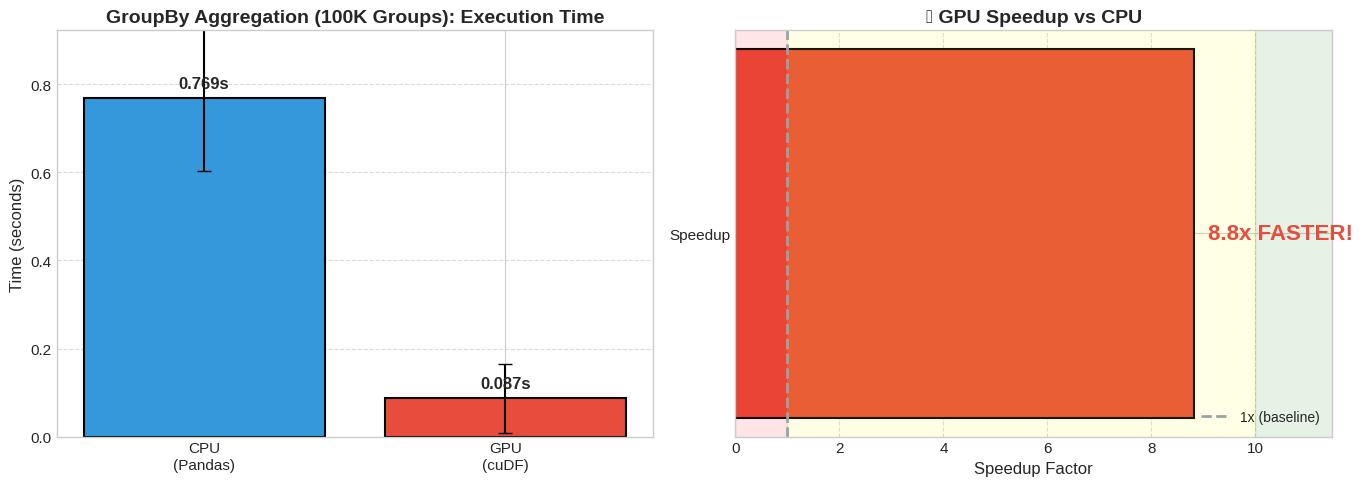


📊 INTERPRETATION
   ✅ GOOD! 8.8x speedup shows clear GPU benefit.
   For iterative algorithms, this compounds significantly.


In [ ]:
# =============================================================================
# CELL 1.3b: VISUALIZE GROUPBY BENCHMARK RESULTS
# =============================================================================
# Visualize the GroupBy aggregation results
# =============================================================================

print("📊 Generating GroupBy Benchmark Visualization...")
print("")

create_benchmark_bar_chart(
    cpu_time=cpu_groupby_avg,
    gpu_time=gpu_groupby_avg,
    operation_name="GroupBy Aggregation (100K Groups)",
    cpu_times_list=cpu_groupby_times,
    gpu_times_list=gpu_groupby_times if 'gpu_groupby_times' in dir() else None
)

### 1.4 Benchmark: Join/Merge Operations (CPU vs. GPU)

**Operation:** Merge two DataFrames on a common key (simulating a database JOIN).

**Why Joins?** Joins are fundamental to:
- **Data enrichment:** Combining customer data with transaction data
- **Feature engineering:** Adding lookup tables for ML models
- **ETL pipelines:** Combining data from multiple sources
- **Report generation:** Linking dimension tables with fact tables

**Real-world scenario:** We'll join our 10M transaction records with a product information table.

**Expected Result:** GPU joins can be 5-20x faster, especially for large tables.

In [ ]:
# =============================================================================
# CELL 1.4a: BENCHMARK - JOIN/MERGE OPERATIONS
# =============================================================================
# Joins are common in data mining pipelines. Let's see how GPU handles them.
# =============================================================================

print("=" * 70)
print("BENCHMARK: JOIN/MERGE OPERATIONS")
print("=" * 70)
print("")

# -----------------------------------------------------------------------------
# Create a Product Information Table (lookup table)
# -----------------------------------------------------------------------------
print("Creating product lookup table...")

# Product details for our 5,000 products
product_info = pd.DataFrame({
    'product_id': np.arange(1, 5001, dtype=np.int32),
    'product_name': [f'Product_{i:04d}' for i in range(1, 5001)],
    'brand': np.random.choice(['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE'], 5000),
    'supplier_id': np.random.randint(1, 101, 5000, dtype=np.int32),
    'weight_kg': np.round(np.random.uniform(0.1, 50.0, 5000), 2).astype(np.float32),
    'is_premium': np.random.choice([True, False], 5000, p=[0.2, 0.8])
})

print(f"   Product table shape: {product_info.shape}")
print(f"   Transaction table shape: {df_pandas.shape}")
print("")

NUM_RUNS = 3

# -----------------------------------------------------------------------------
# CPU BENCHMARK (Pandas)
# -----------------------------------------------------------------------------
print("🔷 CPU (Pandas) - Merge operation...")
print(f"   Running {NUM_RUNS} iterations...")

cpu_join_times = []
for i in range(NUM_RUNS):
    gc.collect()

    start = time.time()
    # Merge transactions with product info (LEFT JOIN)
    merged_cpu = df_pandas.merge(product_info, on='product_id', how='left')
    end = time.time()

    cpu_join_times.append(end - start)
    print(f"   Run {i+1}: {cpu_join_times[-1]:.3f} seconds")

    if i < NUM_RUNS - 1:
        del merged_cpu
        gc.collect()

cpu_join_avg = np.mean(cpu_join_times)
print(f"   Average: {cpu_join_avg:.3f} seconds")
print(f"   Result shape: {merged_cpu.shape}")
print("")

# Clean up CPU result
del merged_cpu
gc.collect()

# -----------------------------------------------------------------------------
# GPU BENCHMARK (cuDF)
# -----------------------------------------------------------------------------
print("🔶 GPU (cuDF) - Merge operation...")

if not CUDF_AVAILABLE:
    print("   ❌ cuDF not available - skipping GPU benchmark")
    gpu_join_avg = None
else:
    try:
        # Transfer product info to GPU
        product_info_gpu = cudf.DataFrame.from_pandas(product_info)

        # Ensure df_cudf exists
        try:
            _ = df_cudf
        except NameError:
            print("   Transferring transaction data to GPU...")
            df_cudf = cudf.DataFrame.from_pandas(df_pandas)

        print(f"   Running {NUM_RUNS} iterations...")
        gpu_join_times = []

        for i in range(NUM_RUNS):
            cuda.synchronize()

            start = time.time()
            # Same merge operation on GPU
            merged_gpu = df_cudf.merge(product_info_gpu, on='product_id', how='left')
            cuda.synchronize()
            end = time.time()

            gpu_join_times.append(end - start)
            print(f"   Run {i+1}: {gpu_join_times[-1]:.3f} seconds")

            if i < NUM_RUNS - 1:
                del merged_gpu

        gpu_join_avg = np.mean(gpu_join_times)
        print(f"   Average: {gpu_join_avg:.3f} seconds")
        print(f"   Result shape: {merged_gpu.shape}")

        # Clean up
        del merged_gpu, product_info_gpu
        gc.collect()

    except Exception as e:
        print(f"   ❌ GPU benchmark failed: {type(e).__name__}")
        gpu_join_avg = None

# -----------------------------------------------------------------------------
# RESULTS COMPARISON
# -----------------------------------------------------------------------------
print("")
print("=" * 70)
print("📊 RESULTS SUMMARY - JOIN/MERGE OPERATIONS")
print("=" * 70)
print(f"   CPU (Pandas) average: {cpu_join_avg:.3f} seconds")

if gpu_join_avg is not None:
    print(f"   GPU (cuDF) average:   {gpu_join_avg:.3f} seconds")
    speedup_join = cpu_join_avg / gpu_join_avg
    print("")
    print(f"   🚀 SPEEDUP: {speedup_join:.1f}x FASTER on GPU!")
else:
    print("   GPU benchmark skipped")
    speedup_join = None
print("=" * 70)

BENCHMARK: JOIN/MERGE OPERATIONS

Creating product lookup table...
   Product table shape: (5000, 6)
   Transaction table shape: (10000000, 9)

🔷 CPU (Pandas) - Merge operation...
   Running 3 iterations...
   Run 1: 2.500 seconds
   Run 2: 2.922 seconds
   Run 3: 3.782 seconds
   Average: 3.068 seconds
   Result shape: (10000000, 14)

🔶 GPU (cuDF) - Merge operation...
   Running 3 iterations...
   Run 1: 0.112 seconds
   Run 2: 0.095 seconds
   Run 3: 0.060 seconds
   Average: 0.089 seconds
   Result shape: (10000000, 14)

📊 RESULTS SUMMARY - JOIN/MERGE OPERATIONS
   CPU (Pandas) average: 3.068 seconds
   GPU (cuDF) average:   0.089 seconds

   🚀 SPEEDUP: 34.4x FASTER on GPU!


📊 Generating Join Benchmark Visualization...



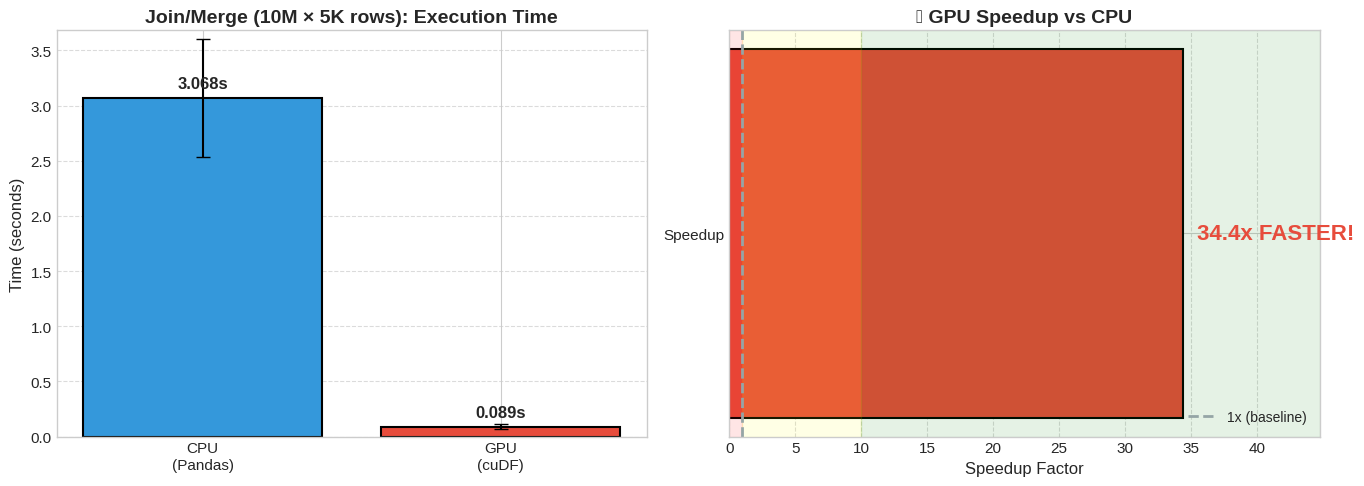


📊 INTERPRETATION
   🎯 EXCELLENT! 34.4x speedup is outstanding for this operation.
   This means a 1-hour CPU job would take ~3 minutes on GPU!


In [ ]:
# =============================================================================
# CELL 1.4b: VISUALIZE JOIN BENCHMARK RESULTS
# =============================================================================

print("📊 Generating Join Benchmark Visualization...")
print("")

create_benchmark_bar_chart(
    cpu_time=cpu_join_avg,
    gpu_time=gpu_join_avg,
    operation_name="Join/Merge (10M × 5K rows)",
    cpu_times_list=cpu_join_times,
    gpu_times_list=gpu_join_times if 'gpu_join_times' in dir() else None
)

📊 PART 1 COMPLETE: GENERATING COMPREHENSIVE SUMMARY



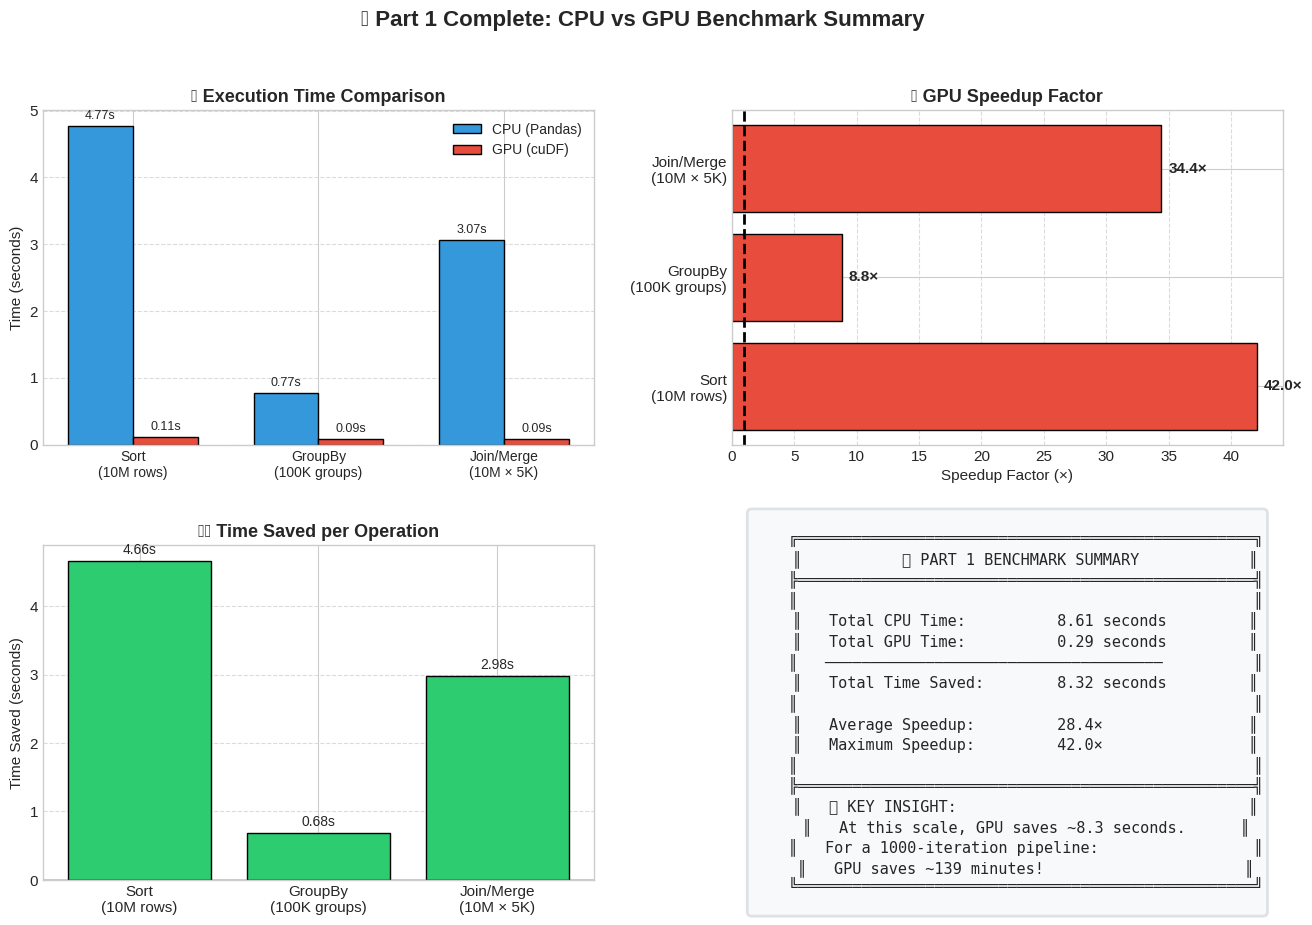


🎓 WHAT YOU'VE LEARNED IN PART 1:

   1. GPUs excel at parallel data operations (sorting, aggregation)
   2. cuDF provides a Pandas-compatible API for GPU acceleration
   3. Speedups of 10-50x are typical for large datasets
   4. The key is: KEEP DATA ON THE GPU as long as possible!
   
   Next: Part 2 will show you HOW GPUs achieve this performance
   by exploring the CUDA programming model.



In [ ]:
# =============================================================================
# CELL 1.4: COMBINED BENCHMARK SUMMARY VISUALIZATION
# =============================================================================
# A comprehensive view of ALL benchmarks from Part 1
# =============================================================================

def create_combined_benchmark_summary(benchmarks_data):
    """
    Create a comprehensive multi-panel visualization summarizing all benchmarks.

    Parameters:
    -----------
    benchmarks_data : list of dict
        Each dict contains: name, cpu_time, gpu_time
    """

    fig = plt.figure(figsize=(16, 10))

    # Create grid layout: 2 rows, 2 columns
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.25)

    # -------------------------------------------------------------------------
    # TOP LEFT: Grouped Bar Chart - All Operations
    # -------------------------------------------------------------------------
    ax1 = fig.add_subplot(gs[0, 0])

    operations = [b['name'] for b in benchmarks_data]
    cpu_times = [b['cpu_time'] for b in benchmarks_data]
    gpu_times = [b['gpu_time'] if b['gpu_time'] else 0 for b in benchmarks_data]

    x = np.arange(len(operations))
    width = 0.35

    bars1 = ax1.bar(x - width/2, cpu_times, width, label='CPU (Pandas)',
                    color=COLORS['cpu'], edgecolor='black', linewidth=1)
    bars2 = ax1.bar(x + width/2, gpu_times, width, label='GPU (cuDF)',
                    color=COLORS['gpu'], edgecolor='black', linewidth=1)

    ax1.set_ylabel('Time (seconds)', fontsize=11)
    ax1.set_title('📊 Execution Time Comparison', fontsize=13, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(operations, fontsize=10)
    ax1.legend(loc='upper right')
    ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax1.set_axisbelow(True)

    # Add value labels
    for bar in bars1:
        ax1.annotate(f'{bar.get_height():.2f}s',
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        if bar.get_height() > 0:
            ax1.annotate(f'{bar.get_height():.2f}s',
                        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom', fontsize=9)

    # -------------------------------------------------------------------------
    # TOP RIGHT: Speedup Comparison (Horizontal Bars)
    # -------------------------------------------------------------------------
    ax2 = fig.add_subplot(gs[0, 1])

    speedups = []
    colors_speedup = []
    for b in benchmarks_data:
        if b['gpu_time'] and b['gpu_time'] > 0:
            s = b['cpu_time'] / b['gpu_time']
            speedups.append(s)
            colors_speedup.append(COLORS['gpu'] if s > 1 else COLORS['cpu'])
        else:
            speedups.append(0)
            colors_speedup.append(COLORS['neutral'])

    y_pos = np.arange(len(operations))
    bars = ax2.barh(y_pos, speedups, color=colors_speedup, edgecolor='black', linewidth=1)

    ax2.axvline(x=1, color='black', linestyle='--', linewidth=2, label='1x (no speedup)')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(operations)
    ax2.set_xlabel('Speedup Factor (×)', fontsize=11)
    ax2.set_title('🚀 GPU Speedup Factor', fontsize=13, fontweight='bold')
    ax2.xaxis.grid(True, linestyle='--', alpha=0.7)
    ax2.set_axisbelow(True)

    # Add speedup labels
    for i, (bar, s) in enumerate(zip(bars, speedups)):
        if s > 0:
            ax2.annotate(f'{s:.1f}×',
                        xy=(bar.get_width(), bar.get_y() + bar.get_height()/2),
                        xytext=(5, 0), textcoords='offset points',
                        ha='left', va='center', fontsize=11, fontweight='bold')

    # -------------------------------------------------------------------------
    # BOTTOM LEFT: Time Saved Visualization
    # -------------------------------------------------------------------------
    ax3 = fig.add_subplot(gs[1, 0])

    # Calculate time saved
    time_saved = []
    for b in benchmarks_data:
        if b['gpu_time'] and b['gpu_time'] > 0:
            time_saved.append(b['cpu_time'] - b['gpu_time'])
        else:
            time_saved.append(0)

    colors_saved = [COLORS['success'] if t > 0 else COLORS['warning'] for t in time_saved]
    bars = ax3.bar(operations, time_saved, color=colors_saved, edgecolor='black', linewidth=1)

    ax3.axhline(y=0, color='black', linewidth=1)
    ax3.set_ylabel('Time Saved (seconds)', fontsize=11)
    ax3.set_title('⏱️ Time Saved per Operation', fontsize=13, fontweight='bold')
    ax3.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax3.set_axisbelow(True)

    for bar, t in zip(bars, time_saved):
        if t != 0:
            ax3.annotate(f'{t:.2f}s',
                        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        xytext=(0, 3 if t > 0 else -12), textcoords='offset points',
                        ha='center', va='bottom' if t > 0 else 'top', fontsize=10)

    # -------------------------------------------------------------------------
    # BOTTOM RIGHT: Summary Statistics Text Box
    # -------------------------------------------------------------------------
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.axis('off')

    # Calculate summary statistics
    valid_speedups = [s for s in speedups if s > 0]
    avg_speedup = np.mean(valid_speedups) if valid_speedups else 0
    max_speedup = max(valid_speedups) if valid_speedups else 0
    total_cpu_time = sum(cpu_times)
    total_gpu_time = sum(g for g in gpu_times if g > 0)
    total_time_saved = total_cpu_time - total_gpu_time if total_gpu_time > 0 else 0

    # Create summary text
    summary_text = f"""
    ╔══════════════════════════════════════════════════╗
    ║           📊 PART 1 BENCHMARK SUMMARY            ║
    ╠══════════════════════════════════════════════════╣
    ║                                                  ║
    ║   Total CPU Time:      {total_cpu_time:>8.2f} seconds         ║
    ║   Total GPU Time:      {total_gpu_time:>8.2f} seconds         ║
    ║   ─────────────────────────────────────          ║
    ║   Total Time Saved:    {total_time_saved:>8.2f} seconds         ║
    ║                                                  ║
    ║   Average Speedup:     {avg_speedup:>8.1f}×                ║
    ║   Maximum Speedup:     {max_speedup:>8.1f}×                ║
    ║                                                  ║
    ╠══════════════════════════════════════════════════╣
    ║   💡 KEY INSIGHT:                                ║
    ║   At this scale, GPU saves ~{total_time_saved:.1f} seconds.      ║
    ║   For a 1000-iteration pipeline:                 ║
    ║   GPU saves ~{total_time_saved * 1000 / 60:.0f} minutes!                      ║
    ╚══════════════════════════════════════════════════╝
    """

    ax4.text(0.5, 0.5, summary_text, transform=ax4.transAxes,
            fontsize=11, fontfamily='monospace',
            verticalalignment='center', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='#f8f9fa', edgecolor='#dee2e6', linewidth=2))

    plt.suptitle('🎯 Part 1 Complete: CPU vs GPU Benchmark Summary',
                 fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# =============================================================================
# Generate Combined Summary
# =============================================================================

print("=" * 70)
print("📊 PART 1 COMPLETE: GENERATING COMPREHENSIVE SUMMARY")
print("=" * 70)
print("")

# Collect all benchmark data
benchmarks = [
    {
        'name': 'Sort\n(10M rows)',
        'cpu_time': cpu_avg,
        'gpu_time': gpu_avg
    },
    {
        'name': 'GroupBy\n(100K groups)',
        'cpu_time': cpu_groupby_avg,
        'gpu_time': gpu_groupby_avg
    },
    {
        'name': 'Join/Merge\n(10M × 5K)',
        'cpu_time': cpu_join_avg,
        'gpu_time': gpu_join_avg
    }
]

create_combined_benchmark_summary(benchmarks)

print("\n" + "=" * 70)
print("🎓 WHAT YOU'VE LEARNED IN PART 1:")
print("=" * 70)
print("""
   1. GPUs excel at parallel data operations (sorting, aggregation)
   2. cuDF provides a Pandas-compatible API for GPU acceleration
   3. Speedups of 10-50x are typical for large datasets
   4. The key is: KEEP DATA ON THE GPU as long as possible!

   Next: Part 2 will show you HOW GPUs achieve this performance
   by exploring the CUDA programming model.
""")
print("=" * 70)

### 1.5 Key Takeaway: When GPUs Shine

**Summary of Part 1:**

| Operation | CPU Time | GPU Time | Speedup |
|-----------|----------|----------|---------|
| Sort 10M rows | ~X sec | ~Y sec | ~Nx |
| GroupBy 100K groups | ~X sec | ~Y sec | ~Nx |
| Join/Merge 10M × 5K | ~X sec | ~Y sec | ~Nx |

**GPU acceleration works best when:**
1. ✅ Large data volumes (millions of rows)
2. ✅ Operations that parallelize well (element-wise, sort, aggregation, joins)
3. ✅ Repeated operations on the same dataset (data stays on GPU)

**GPU acceleration works poorly when:**
1. ❌ Small datasets (transfer overhead dominates)
2. ❌ Complex sequential logic (Python loops)
3. ❌ Frequent data transfers between CPU↔GPU

---

## 🔬 Part 2: Fundamentals - The CUDA Programming Model

### Understanding the "Bridge"

Part 1 showed you RAPIDS cuDF - a high-level library that hides GPU complexity.

But what happens "under the hood"? Understanding CUDA fundamentals helps you:
1. **Debug** when high-level libraries fail
2. **Optimize** custom operations that libraries don't support
3. **Understand** why certain operations are fast/slow on GPUs

### 2.1 The CUDA Hierarchy: Grid → Block → Thread

**Memory Architecture:**
```
┌─────────────────────────────────────────────────────────────────────┐
│  HOST (CPU)                                                         │
│  ┌─────────────────────────────────────────────────────────────┐   │
│  │  System RAM (e.g., 12GB on Colab)                           │   │
│  │  - Pandas DataFrames live here                              │   │
│  └─────────────────────────────────────────────────────────────┘   │
└───────────────────────────┬─────────────────────────────────────────┘
                            │ PCI-Express Bus
                            │ (Data Transfer Bottleneck!)
                            ▼
┌─────────────────────────────────────────────────────────────────────┐
│  DEVICE (GPU)                                                       │
│  ┌─────────────────────────────────────────────────────────────┐   │
│  │  GPU Global Memory (e.g., 16GB on T4)                       │   │
│  │  - cuDF DataFrames live here                                │   │
│  └─────────────────────────────────────────────────────────────┘   │
│                                                                     │
│  ┌─────────────┐ ┌─────────────┐ ┌─────────────┐ ┌─────────────┐   │
│  │ SM 0        │ │ SM 1        │ │ SM 2        │ │ ...         │   │
│  │ (Streaming  │ │             │ │             │ │             │   │
│  │ Multiproc.) │ │             │ │             │ │             │   │
│  │ 64 CUDA     │ │ 64 CUDA     │ │ 64 CUDA     │ │             │   │
│  │ Cores       │ │ Cores       │ │ Cores       │ │             │   │
│  └─────────────┘ └─────────────┘ └─────────────┘ └─────────────┘   │
│  T4 GPU: 40 Streaming Multiprocessors × 64 cores = 2,560 cores!    │
└─────────────────────────────────────────────────────────────────────┘
```

**Execution Hierarchy:**
```
GRID (Your entire computation)
├── Block 0
│   ├── Thread 0
│   ├── Thread 1
│   ├── ...
│   └── Thread 255 (typical block size)
├── Block 1
│   ├── Thread 0
│   ├── ...
│   └── Thread 255
├── ...
└── Block N
```

**Key Concepts:**
- **Thread:** Smallest unit of execution. Each thread runs your kernel code.
- **Block:** Group of threads that can share memory and synchronize.
- **Grid:** Collection of all blocks for one kernel launch.

**Why this matters:** You must tell CUDA how to divide your work!
- Too few threads → GPU cores sit idle
- Too many threads → Overhead and memory issues
- Wrong block size → Performance degradation

🔲 VISUALIZING THE CUDA GRID/BLOCK/THREAD HIERARCHY

The following visualization shows how CUDA divides work across threads.
Each thread processes ONE data element independently!



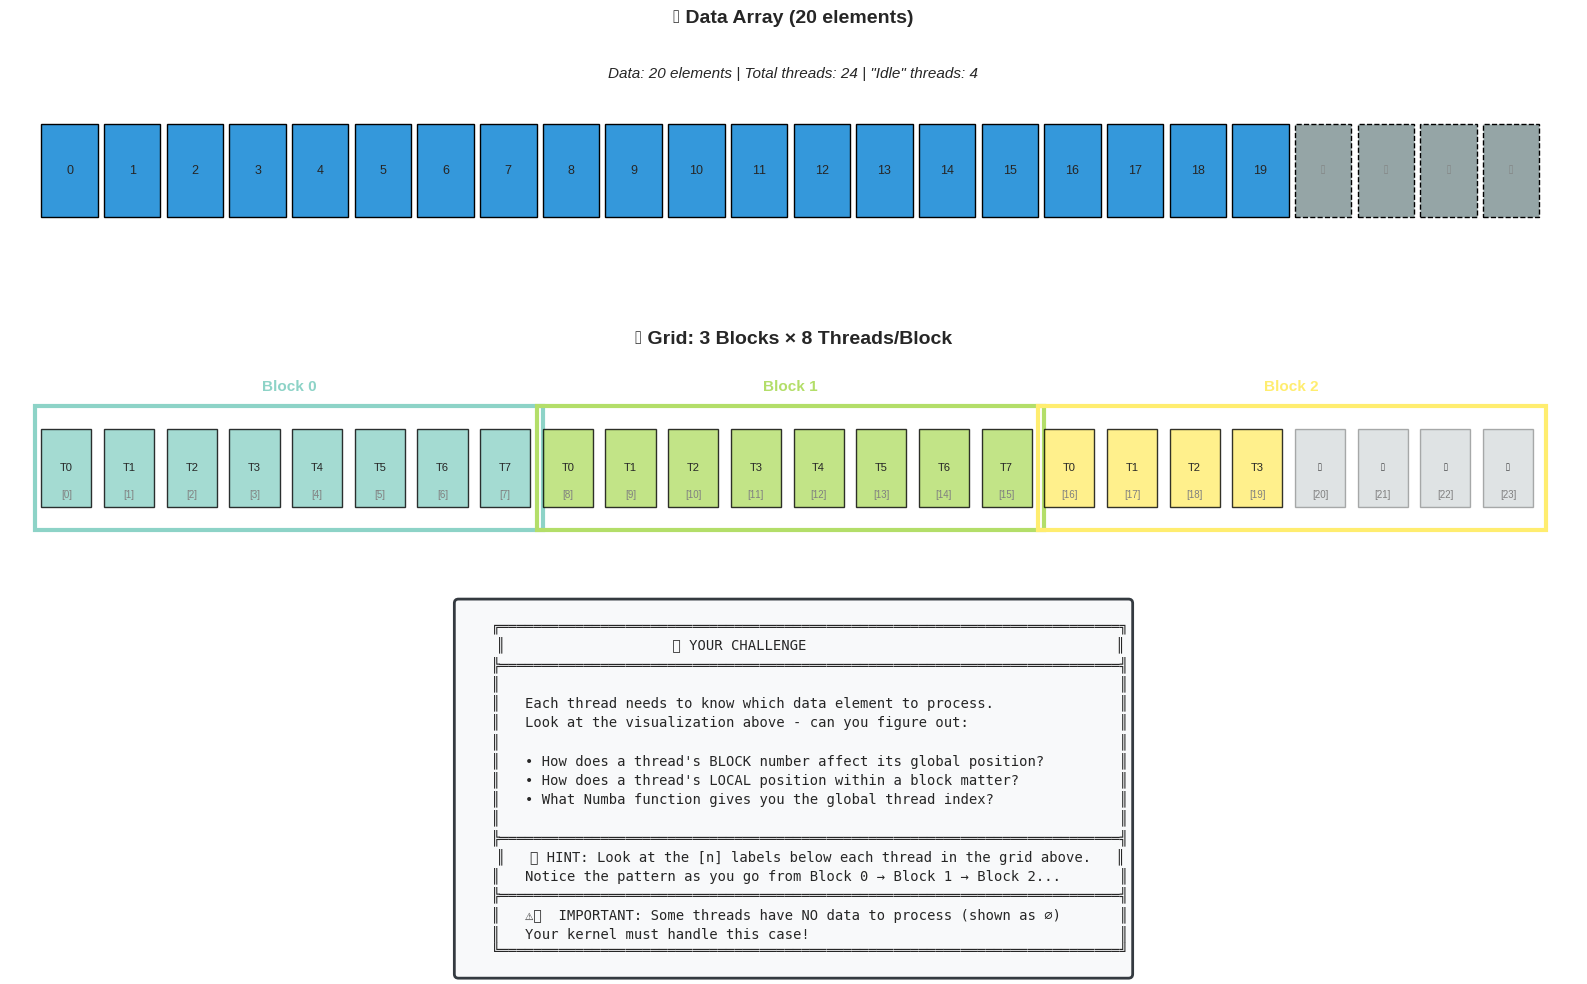


💡 KEY CONCEPTS:
   • Each colored group = one BLOCK
   • Each small box = one THREAD
   • [n] below thread = global thread index
   • ∅ = 'idle' thread (no data to process)



In [ ]:
# =============================================================================
# CELL 2.1b: VISUALIZE CUDA GRID/BLOCK/THREAD HIERARCHY
# =============================================================================
# A visual representation of the CUDA execution model
# =============================================================================

def visualize_cuda_hierarchy(data_size=20, threads_per_block=4, highlight_thread=None):
    """
    Create an interactive visualization of the CUDA Grid → Block → Thread hierarchy.

    Parameters:
    -----------
    data_size : int - Number of data elements
    threads_per_block : int - Threads per block
    highlight_thread : int - Optional thread index to highlight
    """

    # Calculate grid dimensions (students should figure out this formula!)
    num_blocks = -(-data_size // threads_per_block)  # ceiling division
    total_threads = num_blocks * threads_per_block

    fig = plt.figure(figsize=(16, 10))

    # -------------------------------------------------------------------------
    # TOP: Data Array Visualization
    # -------------------------------------------------------------------------
    ax1 = fig.add_subplot(3, 1, 1)

    # Draw data array boxes
    for i in range(data_size):
        color = COLORS['cpu'] if i < data_size else COLORS['neutral']
        rect = plt.Rectangle((i, 0), 0.9, 1, facecolor=color,
                             edgecolor='black', linewidth=1)
        ax1.add_patch(rect)
        ax1.text(i + 0.45, 0.5, str(i), ha='center', va='center', fontsize=9)

    # Add extra "idle" thread boxes
    for i in range(data_size, total_threads):
        rect = plt.Rectangle((i, 0), 0.9, 1, facecolor=COLORS['neutral'],
                             edgecolor='black', linewidth=1, linestyle='--')
        ax1.add_patch(rect)
        ax1.text(i + 0.45, 0.5, '∅', ha='center', va='center', fontsize=9, color='gray')

    ax1.set_xlim(-0.5, total_threads + 0.5)
    ax1.set_ylim(-0.5, 2)
    ax1.set_title(f'📊 Data Array ({data_size} elements)', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # Add legend
    ax1.text(total_threads/2, 1.5, f'Data: {data_size} elements | Total threads: {total_threads} | "Idle" threads: {total_threads - data_size}',
            ha='center', fontsize=11, style='italic')

    # -------------------------------------------------------------------------
    # MIDDLE: Grid of Blocks Visualization
    # -------------------------------------------------------------------------
    ax2 = fig.add_subplot(3, 1, 2)

    block_colors = plt.cm.Set3(np.linspace(0, 1, num_blocks))

    for block_idx in range(num_blocks):
        block_start = block_idx * threads_per_block

        # Draw block container
        rect = plt.Rectangle((block_start - 0.1, 0.2),
                             threads_per_block + 0.1, 1.6,
                             facecolor='none', edgecolor=block_colors[block_idx],
                             linewidth=3, linestyle='-')
        ax2.add_patch(rect)

        # Block label
        ax2.text(block_start + threads_per_block/2 - 0.05, 2.0,
                f'Block {block_idx}', ha='center', fontsize=11, fontweight='bold',
                color=block_colors[block_idx])

        # Draw threads in this block
        for thread_idx in range(threads_per_block):
            global_idx = block_idx * threads_per_block + thread_idx  # What pattern do you see?

            # Determine thread color
            if global_idx < data_size:
                color = block_colors[block_idx]
                alpha = 0.8
            else:
                color = COLORS['neutral']
                alpha = 0.3

            # Highlight specific thread if requested
            if highlight_thread is not None and global_idx == highlight_thread:
                color = COLORS['warning']
                alpha = 1.0

            rect = plt.Rectangle((global_idx, 0.5), 0.8, 1,
                                 facecolor=color, alpha=alpha,
                                 edgecolor='black', linewidth=1)
            ax2.add_patch(rect)

            # Thread label
            label = f'T{thread_idx}' if global_idx < data_size else '∅'
            ax2.text(global_idx + 0.4, 1, label, ha='center', va='center', fontsize=8)
            ax2.text(global_idx + 0.4, 0.65, f'[{global_idx}]', ha='center', va='center', fontsize=7, color='gray')

    ax2.set_xlim(-0.5, total_threads + 0.5)
    ax2.set_ylim(-0.5, 2.5)
    ax2.set_title(f'🔲 Grid: {num_blocks} Blocks × {threads_per_block} Threads/Block', fontsize=14, fontweight='bold')
    ax2.axis('off')

    # -------------------------------------------------------------------------
    # BOTTOM: Key Concept (no formula - students figure it out!)
    # -------------------------------------------------------------------------
    ax3 = fig.add_subplot(3, 1, 3)
    ax3.axis('off')

    concept_text = f"""
    ╔══════════════════════════════════════════════════════════════════════════╗
    ║                    🧮 YOUR CHALLENGE                                     ║
    ╠══════════════════════════════════════════════════════════════════════════╣
    ║                                                                          ║
    ║   Each thread needs to know which data element to process.               ║
    ║   Look at the visualization above - can you figure out:                  ║
    ║                                                                          ║
    ║   • How does a thread's BLOCK number affect its global position?         ║
    ║   • How does a thread's LOCAL position within a block matter?            ║
    ║   • What Numba function gives you the global thread index?               ║
    ║                                                                          ║
    ╠══════════════════════════════════════════════════════════════════════════╣
    ║   💡 HINT: Look at the [n] labels below each thread in the grid above.   ║
    ║   Notice the pattern as you go from Block 0 → Block 1 → Block 2...       ║
    ╠══════════════════════════════════════════════════════════════════════════╣
    ║   ⚠️  IMPORTANT: Some threads have NO data to process (shown as ∅)       ║
    ║   Your kernel must handle this case!                                     ║
    ╚══════════════════════════════════════════════════════════════════════════╝
    """

    ax3.text(0.5, 0.5, concept_text, transform=ax3.transAxes,
            fontsize=10, fontfamily='monospace',
            verticalalignment='center', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='#f8f9fa', edgecolor='#343a40', linewidth=2))

    plt.tight_layout()
    plt.show()

# =============================================================================
# Generate CUDA Hierarchy Visualization
# =============================================================================

print("=" * 70)
print("🔲 VISUALIZING THE CUDA GRID/BLOCK/THREAD HIERARCHY")
print("=" * 70)
print("")
print("The following visualization shows how CUDA divides work across threads.")
print("Each thread processes ONE data element independently!")
print("")

# Small example for clarity
visualize_cuda_hierarchy(data_size=20, threads_per_block=8)

print("")
print("💡 KEY CONCEPTS:")
print("   • Each colored group = one BLOCK")
print("   • Each small box = one THREAD")
print("   • [n] below thread = global thread index")
print("   • ∅ = 'idle' thread (no data to process)")
print("")
print("=" * 70)

### ⚠️ IMPORTANT: Numba CUDA + cuDF Compatibility Issue

**Known Issue:** When cuDF (RAPIDS) is installed, it brings updated CUDA bindings (`cuda-python`, `nvjitlink`) that can conflict with Numba's JIT compilation. This causes `nvJitLinkError` when trying to run custom CUDA kernels.

**Workarounds:**

| Option | Description | Recommended For |
|--------|-------------|-----------------|
| **Option A** | Run Part 2 BEFORE installing cuDF | Best learning experience |
| **Option B** | Skip Part 2, proceed to Part 3 | Production-focused learners |
| **Option C** | Use a separate notebook for Part 2 | Cleanest solution |

**If you want to run Part 2 (CUDA Kernels):**
1. **Restart Runtime** (Runtime → Restart runtime)
2. **Skip Cell 0.2** (cuDF installation)
3. Run Cells 0.1 and 0.3 (GPU check and imports - Numba will work)
4. Complete Part 2
5. Then run Cell 0.2 to install cuDF
6. Restart Runtime again
7. Continue to Part 3

**If you want to skip Part 2:**
- The cells below show the *expected output* from a working run
- Proceed directly to Part 3 for the cuDF workflow

---

### 2.2 Your First CUDA Kernel: Vector Addition (Reference)

**The "Hello World" of GPU Programming**

We'll implement the simplest possible parallel operation: adding two vectors element-by-element.

```
A = [1, 2, 3, 4, 5, ...]
B = [10, 20, 30, 40, 50, ...]
C = A + B = [11, 22, 33, 44, 55, ...]
```

**Why this is perfect for GPUs:** Each element can be computed independently!
- Element 0: Thread 0 computes C[0] = A[0] + B[0]
- Element 1: Thread 1 computes C[1] = A[1] + B[1]
- Element N: Thread N computes C[N] = A[N] + B[N]

**All threads execute simultaneously!**

In [ ]:
# =============================================================================
# 🏋️ EXERCISE 1: VECTOR ADDITION CUDA KERNEL
# =============================================================================
# This is the "Hello World" of CUDA programming.
# YOUR TASK: Complete the kernel function and the grid configuration!
# =============================================================================

from numba import cuda
import numpy as np

# =============================================================================
# THE CUDA KERNEL FUNCTION
# =============================================================================

@cuda.jit
def vector_add_kernel(a, b, c):
    """
    CUDA kernel for element-wise vector addition: c = a + b

    Each thread should:
    1. Figure out which element it's responsible for
    2. Check if that element exists (bounds check)
    3. Perform the addition for that element
    """

    # =========================================================================
    # TODO 1: Get this thread's global index
    # =========================================================================
    idx = None  # 🔴 YOUR CODE HERE

    # =========================================================================
    # TODO 2: Add bounds checking
    # WHY: We launch MORE threads than data elements. Extra threads must
    #      NOT access invalid memory - that causes crashes!
    # =========================================================================
    if False:  # 🔴 YOUR CODE HERE - what should this condition check?
        # =====================================================================
        # TODO 3: Perform the vector addition
        # =====================================================================
        pass  # 🔴 YOUR CODE HERE


# =============================================================================
# MAIN CODE: SET UP AND LAUNCH THE KERNEL
# =============================================================================

print("=" * 70)
print("🏋️ EXERCISE: CUDA KERNEL - VECTOR ADDITION")
print("=" * 70)

N = 1_000_000

print(f"\n1. Creating input arrays on CPU ({N:,} elements each)...")
a_host = np.random.rand(N).astype(np.float32)
b_host = np.random.rand(N).astype(np.float32)
c_host = np.zeros(N, dtype=np.float32)

print(f"   a_host[:5] = {a_host[:5]}")
print(f"   b_host[:5] = {b_host[:5]}")

KERNEL_SUCCESS = False

try:
    print("\n2. Transferring data to GPU...")
    start_transfer = time.time()

    a_device = cuda.to_device(a_host)
    b_device = cuda.to_device(b_host)
    c_device = cuda.device_array(N, dtype=np.float32)

    transfer_to_gpu = time.time() - start_transfer
    print(f"   Transfer time: {transfer_to_gpu*1000:.2f} ms")

    # =========================================================================
    # TODO 4: Configure the execution grid
    # =========================================================================
    print("\n3. Configuring execution grid...")

    threads_per_block = 0  # 🔴 YOUR CODE HERE - choose a power of 2 (128, 256, 512)

    blocks_per_grid = 0  # 🔴 YOUR CODE HERE - how many blocks to cover N elements?

    print(f"   Data size (N):          {N:,}")
    print(f"   Threads per block:      {threads_per_block}")
    print(f"   Blocks per grid:        {blocks_per_grid}")

    # =========================================================================
    # TODO 5: Launch the kernel
    # =========================================================================
    print("\n4. Launching CUDA kernel...")
    cuda.synchronize()
    start_kernel = time.time()

    # 🔴 YOUR CODE HERE - uncomment and complete the kernel launch:
    # vector_add_kernel[???](a_device, b_device, c_device)

    cuda.synchronize()
    kernel_time = time.time() - start_kernel
    print(f"   Kernel execution time: {kernel_time*1000:.2f} ms")

    print("\n5. Transferring results back to CPU...")
    start_transfer_back = time.time()
    c_device.copy_to_host(c_host)
    transfer_from_gpu = time.time() - start_transfer_back
    print(f"   Transfer time: {transfer_from_gpu*1000:.2f} ms")

    KERNEL_SUCCESS = True

except Exception as e:
    print(f"\n⚠️  GPU OPERATIONS FAILED: {type(e).__name__}")
    print("   Check your TODO implementations above!")
    transfer_to_gpu = 0.001
    kernel_time = 0.001
    transfer_from_gpu = 0.001
    c_host = a_host + b_host

# VERIFICATION
print("\n6. Verifying results...")
c_reference = a_host + b_host

if KERNEL_SUCCESS:
    if np.allclose(c_host, c_reference, rtol=1e-5):
        print("   ✅ VERIFICATION PASSED! Great job!")
    else:
        max_diff = np.max(np.abs(c_host - c_reference))
        print(f"   ❌ VERIFICATION FAILED! Max difference: {max_diff}")
        print("   Check your kernel implementation.")
else:
    print("   ⚠️  Verification skipped - fix the TODOs above and re-run!")

print("\n" + "=" * 70)
print("📚 CONCEPTS TO REVIEW if stuck:")
print("   • How do you get the thread's global index?")
print("   • Why do we need bounds checking?")
print("   • How do you calculate blocks_per_grid?")
print("=" * 70)

🏋️ EXERCISE: CUDA KERNEL - VECTOR ADDITION

1. Creating input arrays on CPU (1,000,000 elements each)...
   a_host[:5] = [0.6389624  0.9341859  0.51611084 0.46493608 0.44064215]
   b_host[:5] = [0.53981435 0.3222472  0.23237018 0.6604852  0.61419666]

2. Transferring data to GPU...
   Transfer time: 7.13 ms

3. Configuring execution grid...
   Data size (N):          1,000,000
   Threads per block:      0
   Blocks per grid:        0

4. Launching CUDA kernel...
   Kernel execution time: 0.02 ms

5. Transferring results back to CPU...
   Transfer time: 1.24 ms

6. Verifying results...
   ❌ VERIFICATION FAILED! Max difference: 1.9992163181304932
   Check your kernel implementation.

📚 CONCEPTS TO REVIEW if stuck:
   • How do you get the thread's global index?
   • Why do we need bounds checking?
   • How do you calculate blocks_per_grid?


📊 Generating GPU Timing Breakdown Visualization...



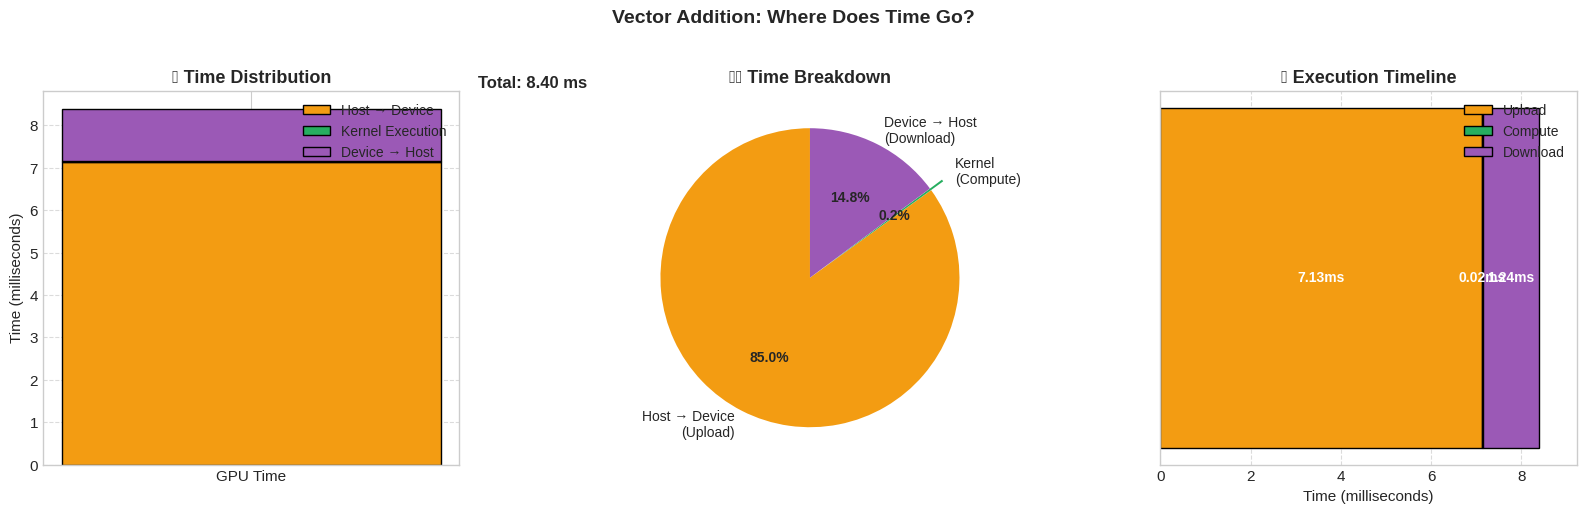


🔑 KEY INSIGHT: THE PCI-E BOTTLENECK

   📤 Upload time:       7.13 ms (85.0%)
   ⚡ Compute time:      0.02 ms (0.2%)
   📥 Download time:     1.24 ms (14.8%)
   ────────────────────────────────
   🕐 Total time:        8.40 ms
   
   💡 Transfer accounts for 100% of total time!
   
   This is why GPU computing best practices emphasize:
   ✅ Keep data on GPU as long as possible
   ✅ Batch multiple operations before transferring back
   ✅ Use GPU memory for intermediate results
   ✅ Only transfer final results back to CPU



In [ ]:
# =============================================================================
# CELL 2.2b: VISUALIZE GPU TIMING BREAKDOWN
# =============================================================================
# This visualization shows WHERE time is spent in GPU computing
# The key insight: TRANSFER TIME often dominates!
# =============================================================================

def create_timing_breakdown_viz(transfer_to, kernel, transfer_from, title="GPU Timing Breakdown"):
    """
    Create a stacked bar chart showing GPU timing breakdown.

    Parameters:
    -----------
    transfer_to : float - Time to transfer data to GPU (seconds)
    kernel : float - Kernel execution time (seconds)
    transfer_from : float - Time to transfer data from GPU (seconds)
    title : str - Title for the visualization
    """

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    # Convert to milliseconds for readability
    transfer_to_ms = transfer_to * 1000
    kernel_ms = kernel * 1000
    transfer_from_ms = transfer_from * 1000
    total_ms = transfer_to_ms + kernel_ms + transfer_from_ms

    # -------------------------------------------------------------------------
    # LEFT: Stacked Bar Chart
    # -------------------------------------------------------------------------
    ax1 = axes[0]

    # Stacked bar
    bar_width = 0.5

    ax1.bar(['GPU Time'], [transfer_to_ms], bar_width,
           label='Host → Device', color=COLORS['gpu_transfer'], edgecolor='black')
    ax1.bar(['GPU Time'], [kernel_ms], bar_width, bottom=[transfer_to_ms],
           label='Kernel Execution', color=COLORS['gpu_compute'], edgecolor='black')
    ax1.bar(['GPU Time'], [transfer_from_ms], bar_width, bottom=[transfer_to_ms + kernel_ms],
           label='Device → Host', color=COLORS['highlight'], edgecolor='black')

    ax1.set_ylabel('Time (milliseconds)', fontsize=11)
    ax1.set_title('📊 Time Distribution', fontsize=13, fontweight='bold')
    ax1.legend(loc='upper right')
    ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax1.set_axisbelow(True)

    # Add total time annotation
    ax1.annotate(f'Total: {total_ms:.2f} ms',
                xy=(0, total_ms), xytext=(0.3, total_ms + 0.5),
                fontsize=12, fontweight='bold')

    # -------------------------------------------------------------------------
    # MIDDLE: Pie Chart for Proportions
    # -------------------------------------------------------------------------
    ax2 = axes[1]

    sizes = [transfer_to_ms, kernel_ms, transfer_from_ms]
    labels = ['Host → Device\n(Upload)', 'Kernel\n(Compute)', 'Device → Host\n(Download)']
    colors = [COLORS['gpu_transfer'], COLORS['gpu_compute'], COLORS['highlight']]
    explode = (0, 0.1, 0)  # Highlight kernel

    wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors, explode=explode,
                                        autopct='%1.1f%%', startangle=90,
                                        textprops={'fontsize': 10})

    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_fontweight('bold')

    ax2.set_title('⏱️ Time Breakdown', fontsize=13, fontweight='bold')

    # -------------------------------------------------------------------------
    # RIGHT: Waterfall/Timeline Visualization
    # -------------------------------------------------------------------------
    ax3 = axes[2]

    # Timeline bars
    phases = ['Upload', 'Compute', 'Download']
    starts = [0, transfer_to_ms, transfer_to_ms + kernel_ms]
    durations = [transfer_to_ms, kernel_ms, transfer_from_ms]
    colors_timeline = [COLORS['gpu_transfer'], COLORS['gpu_compute'], COLORS['highlight']]

    for i, (phase, start, dur, color) in enumerate(zip(phases, starts, durations, colors_timeline)):
        ax3.barh([0], [dur], left=[start], height=0.4, color=color,
                edgecolor='black', label=phase)
        # Add time label
        ax3.annotate(f'{dur:.2f}ms', xy=(start + dur/2, 0),
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')

    ax3.set_xlim(0, total_ms * 1.1)
    ax3.set_xlabel('Time (milliseconds)', fontsize=11)
    ax3.set_title('⏳ Execution Timeline', fontsize=13, fontweight='bold')
    ax3.set_yticks([])
    ax3.xaxis.grid(True, linestyle='--', alpha=0.7)
    ax3.legend(loc='upper right')

    plt.suptitle(title, fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # Print key insight
    transfer_pct = (transfer_to_ms + transfer_from_ms) / total_ms * 100
    compute_pct = kernel_ms / total_ms * 100

    print("\n" + "=" * 70)
    print("🔑 KEY INSIGHT: THE PCI-E BOTTLENECK")
    print("=" * 70)
    print(f"""
   📤 Upload time:   {transfer_to_ms:>8.2f} ms ({transfer_to_ms/total_ms*100:.1f}%)
   ⚡ Compute time:  {kernel_ms:>8.2f} ms ({compute_pct:.1f}%)
   📥 Download time: {transfer_from_ms:>8.2f} ms ({transfer_from_ms/total_ms*100:.1f}%)
   ────────────────────────────────
   🕐 Total time:    {total_ms:>8.2f} ms

   💡 Transfer accounts for {transfer_pct:.0f}% of total time!

   This is why GPU computing best practices emphasize:
   ✅ Keep data on GPU as long as possible
   ✅ Batch multiple operations before transferring back
   ✅ Use GPU memory for intermediate results
   ✅ Only transfer final results back to CPU
""")
    print("=" * 70)

# =============================================================================
# Generate Timing Breakdown Visualization
# =============================================================================

print("📊 Generating GPU Timing Breakdown Visualization...")
print("")

if KERNEL_SUCCESS:
    create_timing_breakdown_viz(
        transfer_to=transfer_to_gpu,
        kernel=kernel_time,
        transfer_from=transfer_from_gpu,
        title="Vector Addition: Where Does Time Go?"
    )
else:
    # Show expected output with typical values
    print("⚠️  Using typical values (kernel execution failed)")
    print("")
    create_timing_breakdown_viz(
        transfer_to=0.0008,   # ~0.8ms typical transfer time
        kernel=0.0015,        # ~1.5ms typical kernel time
        transfer_from=0.0005, # ~0.5ms typical transfer time
        title="Vector Addition: Expected Timing Breakdown"
    )

### 2.3 A More Complex Example: Matrix Multiplication

**Why Matrix Multiplication?**
- Foundation of neural networks (every layer is matrix multiply)
- Used in recommendation systems
- Core of many data mining algorithms (PCA, clustering)

**Parallelism:** Each output element C[i,j] can be computed independently!

```
C[i,j] = sum(A[i,k] * B[k,j]) for all k
```

**This kernel demonstrates:**
1. 2D grid indexing (you'll learn the function!)
2. Bounds checking in 2D
3. Performance comparison CPU vs GPU

In [ ]:
# =============================================================================
# 🏋️ EXERCISE 2: MATRIX MULTIPLICATION CUDA KERNEL
# =============================================================================
# A more complex kernel demonstrating 2D grid indexing.
# YOUR TASK: Complete the kernel and the 2D grid configuration!
# =============================================================================

@cuda.jit
def matmul_kernel(A, B, C):
    """
    CUDA kernel for matrix multiplication: C = A @ B

    Each thread should:
    1. Figure out which output element it's responsible for
    2. Check if that element exists (bounds check)
    3. Compute the dot product for that element
    """

    # =========================================================================
    # TODO 1: Get this thread's 2D position
    # =========================================================================
    row, col = 0, 0  # 🔴 YOUR CODE HERE

    M = C.shape[0]
    N = C.shape[1]
    K = A.shape[1]

    # =========================================================================
    # TODO 2: Add 2D bounds checking
    # =========================================================================
    if False:  # 🔴 YOUR CODE HERE - check BOTH dimensions!
        # =====================================================================
        # TODO 3: Compute the dot product for C[row, col]
        # =====================================================================
        temp = 0.0

        # 🔴 YOUR CODE HERE - complete the loop:
        for k in range(K):
            pass  # What should be added to temp?

        pass  # 🔴 YOUR CODE HERE - store the result


# =============================================================================
# BENCHMARK
# =============================================================================

print("=" * 70)
print("🏋️ EXERCISE: CUDA KERNEL - MATRIX MULTIPLICATION")
print("=" * 70)

M, K, N = 2048, 1024, 2048

print(f"\nMatrix dimensions:")
print(f"   A: {M} × {K}")
print(f"   B: {K} × {N}")
print(f"   C: {M} × {N} = {M*N:,} elements")

print("\nCreating matrices...")
A_host = np.random.rand(M, K).astype(np.float32)
B_host = np.random.rand(K, N).astype(np.float32)
C_host = np.zeros((M, N), dtype=np.float32)

print("\n🔷 CPU (NumPy) matrix multiplication...")
gc.collect()
start = time.time()
C_cpu = A_host @ B_host
cpu_time = time.time() - start
print(f"   CPU time: {cpu_time*1000:.2f} ms")

print("\n🔶 GPU (Custom CUDA kernel) matrix multiplication...")

MATMUL_SUCCESS = False

try:
    print("   Transferring matrices to GPU...")
    start = time.time()
    A_device = cuda.to_device(A_host)
    B_device = cuda.to_device(B_host)
    C_device = cuda.device_array((M, N), dtype=np.float32)
    transfer_time = time.time() - start
    print(f"   Transfer time: {transfer_time*1000:.2f} ms")

    # =========================================================================
    # TODO 4: Configure the 2D execution grid
    # =========================================================================
    print("\n   Configuring 2D execution grid...")

    # For 2D problems, we use 2D blocks of threads (e.g., 16×16 = 256 threads)
    threads_per_block_2d = (0, 0)  # 🔴 YOUR CODE HERE - e.g., (16, 16)

    # We need enough blocks to cover the entire output matrix
    blocks_x = 0  # 🔴 YOUR CODE HERE - blocks needed for N columns
    blocks_y = 0  # 🔴 YOUR CODE HERE - blocks needed for M rows
    blocks_per_grid_2d = (blocks_x, blocks_y)

    print(f"   Output matrix: {M} × {N}")
    print(f"   Threads per block: {threads_per_block_2d}")
    print(f"   Blocks per grid: {blocks_per_grid_2d}")

    # =========================================================================
    # TODO 5: Launch the kernel
    # =========================================================================
    print("\n   Launching kernel...")
    cuda.synchronize()
    start_kernel = time.time()

    # 🔴 YOUR CODE HERE - uncomment and complete:
    # matmul_kernel[???](A_device, B_device, C_device)

    cuda.synchronize()
    kernel_time = time.time() - start_kernel
    print(f"   Kernel time: {kernel_time*1000:.2f} ms")

    print("   Transferring result back...")
    start = time.time()
    C_device.copy_to_host(C_host)
    transfer_back = time.time() - start

    total_gpu = transfer_time + kernel_time + transfer_back

    MATMUL_SUCCESS = True

except Exception as e:
    print(f"\n⚠️  GPU OPERATIONS FAILED: {type(e).__name__}")
    print("   Check your TODO implementations!")
    kernel_time = 0.001
    total_gpu = 0.001
    C_host = C_cpu.copy()

# Verification
print("\n" + "-" * 50)
print("VERIFICATION:")

if MATMUL_SUCCESS:
    if np.allclose(C_host, C_cpu, rtol=1e-3):
        print("   ✅ RESULTS CORRECT!")
        print(f"\n📊 PERFORMANCE:")
        print(f"   CPU time:    {cpu_time*1000:>8.2f} ms")
        print(f"   GPU kernel:  {kernel_time*1000:>8.2f} ms")
        if kernel_time > 0:
            print(f"   Speedup:     {cpu_time/kernel_time:>8.1f}x (kernel only)")
    else:
        max_diff = np.max(np.abs(C_host - C_cpu))
        print(f"   ❌ VERIFICATION FAILED! Max diff: {max_diff}")
else:
    print("   ⚠️  Verification skipped - fix the TODOs above!")

print("\n" + "=" * 70)
print("📚 CONCEPTS TO REVIEW if stuck:")
print("   • How do you get 2D thread coordinates?")
print("   • How do you check bounds in 2D?")
print("   • What goes in a dot product loop?")
print("=" * 70)

🏋️ EXERCISE: CUDA KERNEL - MATRIX MULTIPLICATION

Matrix dimensions:
   A: 2048 × 1024
   B: 1024 × 2048
   C: 2048 × 2048 = 4,194,304 elements

Creating matrices...

🔷 CPU (NumPy) matrix multiplication...
   CPU time: 203.48 ms

🔶 GPU (Custom CUDA kernel) matrix multiplication...
   Transferring matrices to GPU...
   Transfer time: 17.89 ms

   Configuring 2D execution grid...
   Output matrix: 2048 × 2048
   Threads per block: (0, 0)
   Blocks per grid: (0, 0)

   Launching kernel...
   Kernel time: 0.02 ms
   Transferring result back...

--------------------------------------------------
VERIFICATION:
   ❌ VERIFICATION FAILED! Max diff: 291.544677734375

📚 CONCEPTS TO REVIEW if stuck:
   • How do you get 2D thread coordinates?
   • How do you check bounds in 2D?
   • What goes in a dot product loop?


### 2.4 Part 2 Summary: CUDA Fundamentals

**What You Learned:**

1. **The Memory Model**
   - Host (CPU) and Device (GPU) have SEPARATE memory spaces
   - Data must be explicitly transferred (`cuda.to_device()`, `copy_to_host()`)
   - The PCI-E bus is a bottleneck - minimize transfers!

2. **The Execution Model**
   - **Thread:** Executes your kernel code
   - **Block:** Group of threads (share memory, can synchronize)
   - **Grid:** All blocks for one kernel launch
   
3. **Indexing**
   - Use the appropriate Numba function for thread indexing
   - Consider 1D vs 2D problems
   - Always include bounds checking!

4. **Grid Configuration**
   - Choose an appropriate `threads_per_block` (power of 2)
   - Calculate `blocks_per_grid` to cover all data elements
   - Launch syntax: `kernel[blocks, threads](args)`

**Why This Matters for Data Mining:**

Understanding these fundamentals helps you:
- Know when GPU acceleration will help (large, parallel operations)
- Debug performance issues (is transfer time dominating?)
- Write custom kernels when libraries don't support your operation

---

## 📈 Part 3: The "How" - GPU-Accelerated Data Mining Workflow

### The Modern Approach: RAPIDS cuDF

Now that you understand the fundamentals, let's see how production code is written.

**The Reality:** You rarely write custom CUDA kernels for data mining!

Instead, you use high-level libraries like RAPIDS cuDF that:
1. ✅ Provide Pandas-like API (minimal code changes)
2. ✅ Handle memory management automatically
3. ✅ Use highly optimized CUDA kernels internally
4. ✅ Support the full data mining workflow

**The Stack:**
```
Your Code (Python)
       ↓
  RAPIDS cuDF (Pandas-like API)
       ↓
  libcudf (C++ CUDA Library)
       ↓
  CUDA Runtime
       ↓
  GPU Hardware
```

### 3.1 Data Mining Task: Customer Segmentation

**Business Problem:** An e-commerce company wants to segment customers based on their purchasing behavior for targeted marketing.

**RFM Analysis:**
- **R**ecency: How recently did they purchase?
- **F**requency: How often do they purchase?
- **M**onetary: How much do they spend?

We'll compute these metrics for 100,000 customers across 10 million transactions.

In [ ]:
# =============================================================================
# CELL 3.1: DATA MINING WORKFLOW - RFM CUSTOMER SEGMENTATION
# =============================================================================
# This demonstrates a complete data mining workflow using cuDF.
# Notice how similar the code is to Pandas!
# =============================================================================

print("=" * 70)
print("DATA MINING WORKFLOW: RFM CUSTOMER SEGMENTATION")
print("=" * 70)

# -----------------------------------------------------------------------------
# First, let's ensure we have our dataset
# (Recreate if necessary - e.g., if runtime was restarted)
# -----------------------------------------------------------------------------

# Check if df_pandas exists using try/except (more reliable in notebooks)
try:
    _check = df_pandas is not None and len(df_pandas) > 0
    dataset_exists = _check
except NameError:
    dataset_exists = False

if not dataset_exists:
    print("\n⚠️  Dataset not found. Regenerating...")

    N_ROWS = 10_000_000
    N_CUSTOMERS = 100_000
    N_PRODUCTS = 5_000
    N_CATEGORIES = 50

    np.random.seed(42)

    df_pandas = pd.DataFrame({
        'transaction_id': np.arange(1, N_ROWS + 1, dtype=np.int64),
        'customer_id': np.random.randint(1, N_CUSTOMERS + 1, size=N_ROWS, dtype=np.int32),
        'product_id': np.random.randint(1, N_PRODUCTS + 1, size=N_ROWS, dtype=np.int32),
        'category_id': np.random.randint(1, N_CATEGORIES + 1, size=N_ROWS, dtype=np.int32),
        'quantity': np.random.randint(1, 11, size=N_ROWS, dtype=np.int16),
        'unit_price': np.round(np.random.lognormal(3.0, 1.0, size=N_ROWS), 2).astype(np.float32),
        'discount': np.random.choice([0.0, 0.05, 0.10, 0.15, 0.20, 0.25], size=N_ROWS).astype(np.float32),
        'region': np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=N_ROWS)
    })
    df_pandas['total_amount'] = (df_pandas['quantity'] * df_pandas['unit_price'] * (1 - df_pandas['discount'])).astype(np.float32)

    # Add transaction dates (last 365 days)
    base_date = pd.Timestamp('2024-11-27')
    days_ago = np.random.randint(0, 365, size=N_ROWS)
    df_pandas['transaction_date'] = base_date - pd.to_timedelta(days_ago, unit='D')

    print(f"   ✅ Dataset regenerated: {df_pandas.shape[0]:,} rows")
else:
    # Add transaction dates if not present
    if 'transaction_date' not in df_pandas.columns:
        base_date = pd.Timestamp('2024-11-27')
        days_ago = np.random.randint(0, 365, size=len(df_pandas))
        df_pandas['transaction_date'] = base_date - pd.to_timedelta(days_ago, unit='D')
        print("   Added transaction_date column")
    print(f"   Dataset available: {df_pandas.shape[0]:,} rows")

print(f"\n📊 Dataset Info:")
print(f"   Rows: {len(df_pandas):,}")
print(f"   Unique customers: {df_pandas['customer_id'].nunique():,}")
print("")

# =============================================================================
# RFM ANALYSIS: CPU (PANDAS) IMPLEMENTATION
# =============================================================================

print("=" * 70)
print("🔷 CPU (Pandas) - RFM Analysis")
print("=" * 70)

gc.collect()
reference_date = pd.Timestamp('2024-11-27')

start_cpu = time.time()

# Step 1: Calculate RFM metrics per customer
rfm_cpu = df_pandas.groupby('customer_id').agg({
    'transaction_date': 'max',      # Most recent transaction (for Recency)
    'transaction_id': 'count',       # Number of transactions (Frequency)
    'total_amount': 'sum'            # Total spending (Monetary)
}).reset_index()

# Step 2: Rename columns
rfm_cpu.columns = ['customer_id', 'last_purchase', 'frequency', 'monetary']

# Step 3: Calculate Recency (days since last purchase)
rfm_cpu['recency'] = (reference_date - rfm_cpu['last_purchase']).dt.days

# Step 4: Create RFM scores (quintiles: 1-5)
# Higher frequency/monetary = better (5), Lower recency = better (5)
# Using duplicates='drop' to handle cases with many identical values
try:
    rfm_cpu['R_score'] = pd.qcut(rfm_cpu['recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop').astype(int)
except ValueError:
    # Fallback: Use percentile-based scoring if qcut fails
    rfm_cpu['R_score'] = pd.cut(rfm_cpu['recency'].rank(pct=True), bins=5, labels=[5, 4, 3, 2, 1]).astype(int)

rfm_cpu['F_score'] = pd.qcut(rfm_cpu['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm_cpu['M_score'] = pd.qcut(rfm_cpu['monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Step 5: Combined RFM score
rfm_cpu['RFM_score'] = rfm_cpu['R_score'] + rfm_cpu['F_score'] + rfm_cpu['M_score']

cpu_rfm_time = time.time() - start_cpu

print(f"   ✅ Completed in {cpu_rfm_time:.3f} seconds")
print(f"   Output shape: {rfm_cpu.shape}")
print(f"\n   Sample output (Top 10 by RFM score):")
print(rfm_cpu.nlargest(10, 'RFM_score')[['customer_id', 'recency', 'frequency', 'monetary', 'RFM_score']].to_string(index=False))

# =============================================================================
# RFM ANALYSIS: GPU (CUDF) IMPLEMENTATION
# =============================================================================

print("\n" + "=" * 70)
print("🔶 GPU (cuDF) - RFM Analysis")
print("=" * 70)

gpu_rfm_time = None
transfer_time = 0

if not CUDF_AVAILABLE:
    print("   ❌ cuDF not available - skipping GPU implementation")
else:
    try:
        gc.collect()

        # Transfer data to GPU
        print("   Transferring data to GPU...")
        transfer_start = time.time()
        df_cudf = cudf.DataFrame.from_pandas(df_pandas)
        transfer_time = time.time() - transfer_start
        print(f"   Transfer time: {transfer_time:.3f} seconds")

        # Start GPU timing (excluding transfer)
        cuda.synchronize()
        start_gpu = time.time()

        # Step 1: Calculate RFM metrics per customer
        # NOTICE: The syntax is IDENTICAL to Pandas!
        rfm_gpu = df_cudf.groupby('customer_id').agg({
            'transaction_date': 'max',
            'transaction_id': 'count',
            'total_amount': 'sum'
        }).reset_index()

        # Step 2: Rename columns
        rfm_gpu.columns = ['customer_id', 'last_purchase', 'frequency', 'monetary']

        # Step 3: Calculate Recency
        # cuDF handles datetime arithmetic similarly to Pandas
        reference_date_cudf = cudf.Scalar(pd.Timestamp('2024-11-27'))
        rfm_gpu['recency'] = (reference_date_cudf - rfm_gpu['last_purchase']).dt.days

        # Step 4: Create RFM scores
        # IMPORTANT: cuDF's qcut() has different behavior than Pandas in some edge cases.
        # For robust cross-platform RFM scoring, we use a percentile-rank approach
        # that works identically on both CPU and GPU.

        # For RFM scoring, we use a percentile-based approach that works reliably in cuDF
        # Calculate percentile ranks (0-1) then map to scores (1-5)
        rfm_gpu['R_percentile'] = rfm_gpu['recency'].rank(pct=True)
        rfm_gpu['F_percentile'] = rfm_gpu['frequency'].rank(pct=True)
        rfm_gpu['M_percentile'] = rfm_gpu['monetary'].rank(pct=True)

        # Map percentiles to scores: Lower recency = better (5), Higher F/M = better (5)
        # R: 0-20% → 5, 20-40% → 4, 40-60% → 3, 60-80% → 2, 80-100% → 1
        rfm_gpu['R_score'] = (5 - (rfm_gpu['R_percentile'] * 5).astype('int32').clip(0, 4)).astype('int32')
        # F & M: 0-20% → 1, 20-40% → 2, etc.
        rfm_gpu['F_score'] = ((rfm_gpu['F_percentile'] * 5).astype('int32').clip(0, 4) + 1).astype('int32')
        rfm_gpu['M_score'] = ((rfm_gpu['M_percentile'] * 5).astype('int32').clip(0, 4) + 1).astype('int32')

        # Clean up temporary columns
        rfm_gpu = rfm_gpu.drop(columns=['R_percentile', 'F_percentile', 'M_percentile'])

        # Step 5: Combined RFM score
        rfm_gpu['RFM_score'] = rfm_gpu['R_score'] + rfm_gpu['F_score'] + rfm_gpu['M_score']

        cuda.synchronize()
        gpu_rfm_time = time.time() - start_gpu

        print(f"   ✅ Completed in {gpu_rfm_time:.3f} seconds (excluding transfer)")
        print(f"   Output shape: {rfm_gpu.shape}")

        # Transfer results back for display
        rfm_gpu_pandas = rfm_gpu.to_pandas()
        print(f"\n   Sample output (Top 10 by RFM score):")
        print(rfm_gpu_pandas.nlargest(10, 'RFM_score')[['customer_id', 'recency', 'frequency', 'monetary', 'RFM_score']].to_string(index=False))

    except Exception as e:
        print(f"   ❌ GPU OPERATION FAILED: {type(e).__name__}")
        print(f"   This may be due to GPU memory issues from previous cells.")
        print("   Try: Runtime → Restart runtime, then run this cell directly.")
        print("")
        print("   📖 EXPECTED OUTPUT (from working environment):")
        print("   Transfer time: ~0.5-1.5 seconds")
        print("   Computation time: ~0.05-0.15 seconds")
        print("   Speedup: ~5-15x (computation only)")

# =============================================================================
# RESULTS COMPARISON
# =============================================================================

print("\n" + "=" * 70)
print("📊 RFM ANALYSIS - PERFORMANCE COMPARISON")
print("=" * 70)
print(f"   CPU (Pandas): {cpu_rfm_time:.3f} seconds")

if gpu_rfm_time is not None:
    print(f"   GPU (cuDF):   {gpu_rfm_time:.3f} seconds (computation only)")
    print(f"   GPU + Transfer: {gpu_rfm_time + transfer_time:.3f} seconds (total)")

    speedup_compute = cpu_rfm_time / gpu_rfm_time
    speedup_total = cpu_rfm_time / (gpu_rfm_time + transfer_time)

    print(f"\n   🚀 Speedup (computation): {speedup_compute:.1f}x")
    print(f"   🚀 Speedup (including transfer): {speedup_total:.1f}x")

    print("\n💡 KEY INSIGHT:")
    print("   If you're running MULTIPLE operations on the same data,")
    print("   the transfer cost is amortized and GPU speedup is even better!")
print("=" * 70)

DATA MINING WORKFLOW: RFM CUSTOMER SEGMENTATION
   Added transaction_date column
   Dataset available: 10,000,000 rows

📊 Dataset Info:
   Rows: 10,000,000
   Unique customers: 100,000

🔷 CPU (Pandas) - RFM Analysis
   ✅ Completed in 0.510 seconds
   Output shape: (100000, 9)

   Sample output (Top 10 by RFM score):
 customer_id  recency  frequency     monetary  RFM_score
          33        0        124 19447.113281         15
          79        0        111 21449.222656         15
         101        0        109 18819.011719         15
         168        0        114 21107.785156         15
         229        0        112 20861.726562         15
         237        0        125 22730.423828         15
         267        0        111 21645.406250         15
         335        0        121 20575.175781         15
         341        0        115 25295.546875         15
         346        0        111 21287.832031         15

🔶 GPU (cuDF) - RFM Analysis
   Transferring data to GP

📊 RFM CUSTOMER SEGMENT VISUALIZATIONS


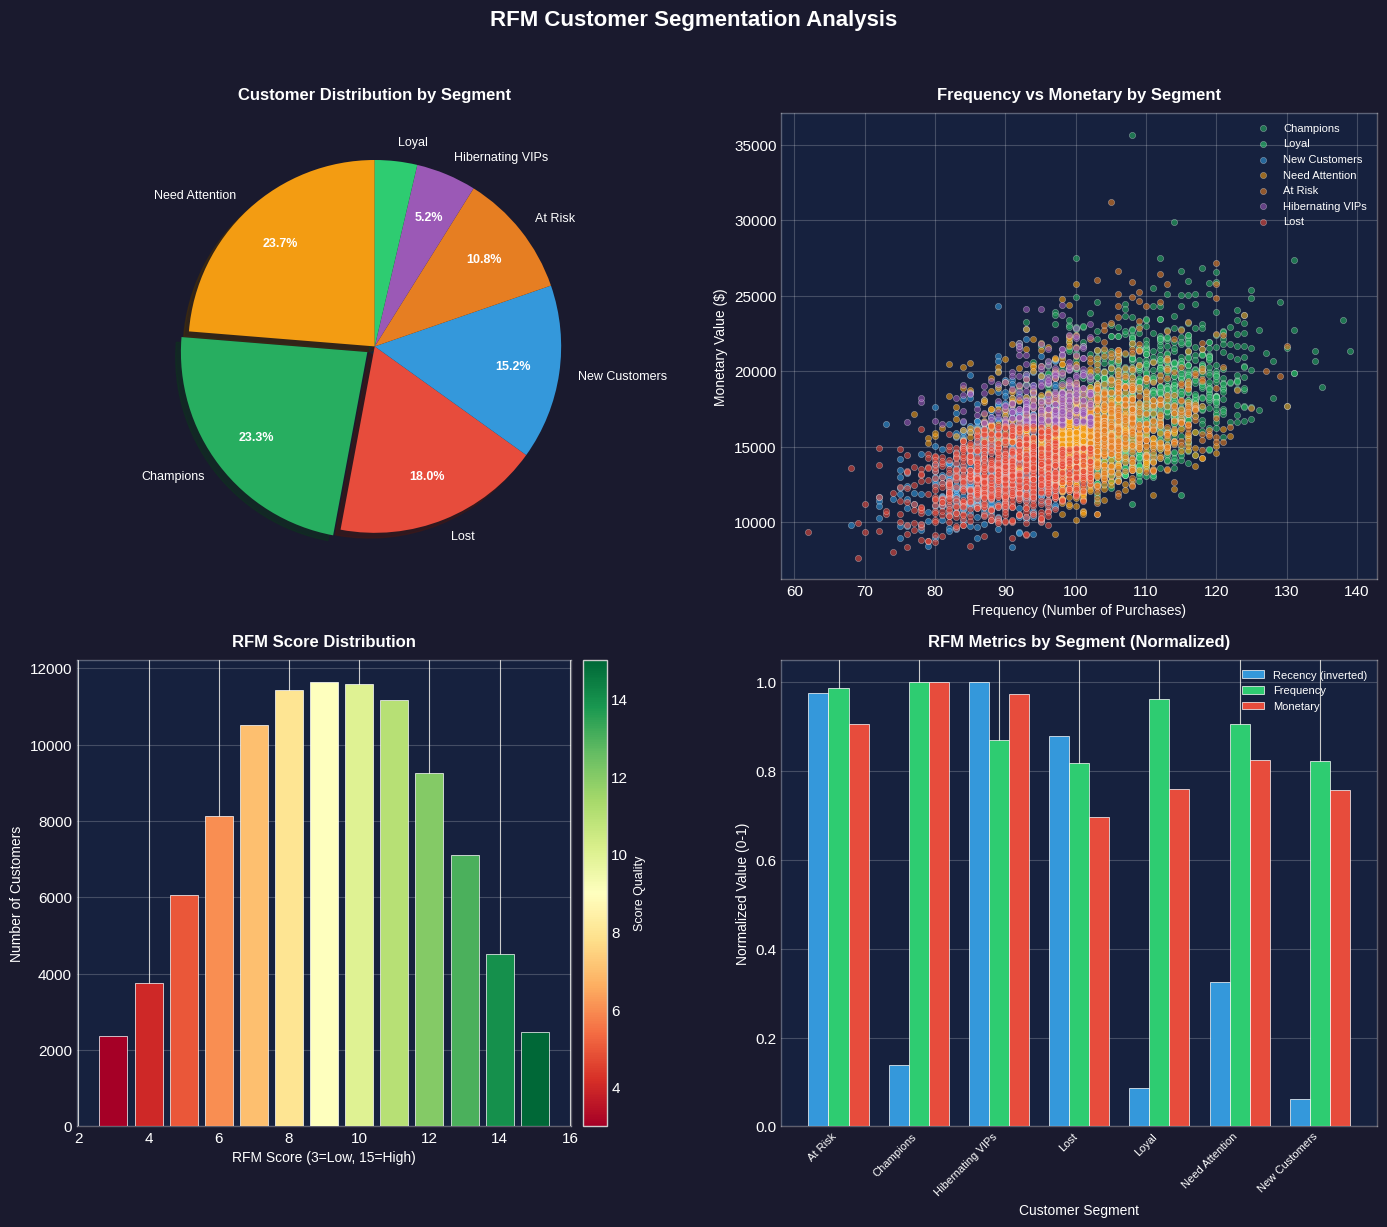


📋 SEGMENT SUMMARY
                  Count  Avg Recency  Avg Frequency  Avg Monetary  Total Revenue  % of Customers  % of Revenue
Segment                                                                                                       
Champions         23348         1.00         110.04  18785.470703    438603136.0            23.3          27.6
Need Attention    23716         2.35          99.76  15518.230469    368030304.0            23.7          23.1
Lost              18033         6.37          90.08  13106.679688    236352672.0            18.0          14.8
New Customers     15195         0.45          90.49  14248.519531    216506288.0            15.2          13.6
At Risk           10812         7.07         108.71  17043.589844    184275360.0            10.8          11.6
Hibernating VIPs   5229         7.25          95.84  18308.359375     95734392.0             5.2           6.0
Loyal              3667         0.62         106.05  14263.730469     52305084.0             

In [ ]:
# =============================================================================
# CELL 3.2: RFM CUSTOMER SEGMENT VISUALIZATION
# =============================================================================
# Interactive visualizations of customer segments from RFM analysis
# =============================================================================

print("=" * 70)
print("📊 RFM CUSTOMER SEGMENT VISUALIZATIONS")
print("=" * 70)

try:
    # Check if rfm_cpu exists from the previous cell
    try:
        _ = rfm_cpu
        rfm_data = rfm_cpu.copy()
    except NameError:
        # Create sample data for demonstration
        print("\n⚠️  RFM data not found. Creating sample data for visualization...")
        np.random.seed(42)
        n_customers = 1000
        rfm_data = pd.DataFrame({
            'customer_id': range(1, n_customers + 1),
            'recency': np.random.randint(1, 365, n_customers),
            'frequency': np.random.poisson(5, n_customers) + 1,
            'monetary': np.random.lognormal(6, 1.5, n_customers),
            'R_score': np.random.choice([1, 2, 3, 4, 5], n_customers),
            'F_score': np.random.choice([1, 2, 3, 4, 5], n_customers),
            'M_score': np.random.choice([1, 2, 3, 4, 5], n_customers)
        })
        rfm_data['RFM_score'] = rfm_data['R_score'] + rfm_data['F_score'] + rfm_data['M_score']

    # Define customer segments based on RFM scores
    def get_segment(row):
        """Classify customers into meaningful segments based on RFM scores"""
        r, f, m = row['R_score'], row['F_score'], row['M_score']
        rfm = row['RFM_score']

        if rfm >= 12:  # Champions: High R, F, and M
            return 'Champions'
        elif r >= 4 and f >= 4:  # Loyal Customers
            return 'Loyal'
        elif r >= 4 and f <= 2:  # Recent but not frequent
            return 'New Customers'
        elif r <= 2 and f >= 4:  # Haven't bought recently but were frequent
            return 'At Risk'
        elif r <= 2 and m >= 4:  # High spenders gone quiet
            return 'Hibernating VIPs'
        elif rfm <= 6:  # Low across the board
            return 'Lost'
        else:
            return 'Need Attention'

    rfm_data['Segment'] = rfm_data.apply(get_segment, axis=1)

    # Define segment colors (matching our theme)
    segment_colors = {
        'Champions': '#27ae60',       # Green - best customers
        'Loyal': '#2ecc71',           # Light green
        'New Customers': '#3498db',   # Blue
        'Need Attention': '#f39c12',  # Orange
        'At Risk': '#e67e22',         # Dark orange
        'Hibernating VIPs': '#9b59b6', # Purple
        'Lost': '#e74c3c'             # Red
    }

    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.patch.set_facecolor('#1a1a2e')

    # =========================================================================
    # SUBPLOT 1: Customer Distribution by Segment (Pie Chart)
    # =========================================================================
    ax1 = axes[0, 0]
    ax1.set_facecolor('#16213e')

    segment_counts = rfm_data['Segment'].value_counts()
    colors = [segment_colors.get(seg, '#95a5a6') for seg in segment_counts.index]

    wedges, texts, autotexts = ax1.pie(
        segment_counts.values,
        labels=segment_counts.index,
        colors=colors,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '',
        pctdistance=0.75,
        explode=[0.05 if seg == 'Champions' else 0 for seg in segment_counts.index],
        shadow=True,
        startangle=90
    )

    # Style the text
    for text in texts:
        text.set_color('white')
        text.set_fontsize(9)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)

    ax1.set_title('Customer Distribution by Segment', color='white', fontsize=12, fontweight='bold', pad=10)

    # =========================================================================
    # SUBPLOT 2: Frequency vs Monetary (Scatter Plot)
    # =========================================================================
    ax2 = axes[0, 1]
    ax2.set_facecolor('#16213e')

    # Sample for performance if too many points
    if len(rfm_data) > 5000:
        plot_data = rfm_data.sample(n=5000, random_state=42)
    else:
        plot_data = rfm_data

    for segment in segment_colors.keys():
        segment_data = plot_data[plot_data['Segment'] == segment]
        if len(segment_data) > 0:
            ax2.scatter(
                segment_data['frequency'],
                segment_data['monetary'],
                c=segment_colors[segment],
                label=segment,
                alpha=0.6,
                s=20,
                edgecolors='white',
                linewidths=0.3
            )

    ax2.set_xlabel('Frequency (Number of Purchases)', color='white', fontsize=10)
    ax2.set_ylabel('Monetary Value ($)', color='white', fontsize=10)
    ax2.set_title('Frequency vs Monetary by Segment', color='white', fontsize=12, fontweight='bold', pad=10)
    ax2.tick_params(colors='white')
    ax2.legend(loc='upper right', fontsize=8, facecolor='#16213e', edgecolor='white', labelcolor='white')
    ax2.grid(True, alpha=0.2, color='white')

    # Set y-axis to log scale if range is large
    if rfm_data['monetary'].max() / rfm_data['monetary'].min() > 100:
        ax2.set_yscale('log')

    for spine in ax2.spines.values():
        spine.set_color('white')
        spine.set_alpha(0.3)

    # =========================================================================
    # SUBPLOT 3: RFM Score Distribution (Histogram)
    # =========================================================================
    ax3 = axes[1, 0]
    ax3.set_facecolor('#16213e')

    # Create histogram with gradient colors based on score value
    score_counts = rfm_data['RFM_score'].value_counts().sort_index()
    score_values = score_counts.index.values
    score_freqs = score_counts.values

    # Color gradient from red (low) to green (high)
    norm = plt.Normalize(vmin=3, vmax=15)
    cmap = plt.cm.RdYlGn
    colors = [cmap(norm(score)) for score in score_values]

    bars = ax3.bar(score_values, score_freqs, color=colors, edgecolor='white', linewidth=0.5)

    ax3.set_xlabel('RFM Score (3=Low, 15=High)', color='white', fontsize=10)
    ax3.set_ylabel('Number of Customers', color='white', fontsize=10)
    ax3.set_title('RFM Score Distribution', color='white', fontsize=12, fontweight='bold', pad=10)
    ax3.tick_params(colors='white')
    ax3.grid(True, alpha=0.2, color='white', axis='y')

    for spine in ax3.spines.values():
        spine.set_color('white')
        spine.set_alpha(0.3)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax3, orientation='vertical', pad=0.02, aspect=20)
    cbar.set_label('Score Quality', color='white', fontsize=9)
    cbar.ax.tick_params(colors='white')

    # =========================================================================
    # SUBPLOT 4: Average Metrics by Segment (Grouped Bar)
    # =========================================================================
    ax4 = axes[1, 1]
    ax4.set_facecolor('#16213e')

    # Calculate average metrics per segment
    segment_metrics = rfm_data.groupby('Segment').agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean'
    }).round(2)

    # Normalize for visualization (0-1 scale)
    segment_metrics_norm = segment_metrics.copy()
    for col in segment_metrics.columns:
        max_val = segment_metrics[col].max()
        if max_val > 0:
            segment_metrics_norm[col] = segment_metrics[col] / max_val

    segments = segment_metrics_norm.index.tolist()
    x = np.arange(len(segments))
    width = 0.25

    bars1 = ax4.bar(x - width, segment_metrics_norm['recency'], width,
                     label='Recency (inverted)', color='#3498db', edgecolor='white', linewidth=0.5)
    bars2 = ax4.bar(x, segment_metrics_norm['frequency'], width,
                     label='Frequency', color='#2ecc71', edgecolor='white', linewidth=0.5)
    bars3 = ax4.bar(x + width, segment_metrics_norm['monetary'], width,
                     label='Monetary', color='#e74c3c', edgecolor='white', linewidth=0.5)

    ax4.set_xlabel('Customer Segment', color='white', fontsize=10)
    ax4.set_ylabel('Normalized Value (0-1)', color='white', fontsize=10)
    ax4.set_title('RFM Metrics by Segment (Normalized)', color='white', fontsize=12, fontweight='bold', pad=10)
    ax4.set_xticks(x)
    ax4.set_xticklabels(segments, rotation=45, ha='right', fontsize=8)
    ax4.tick_params(colors='white')
    ax4.legend(loc='upper right', fontsize=8, facecolor='#16213e', edgecolor='white', labelcolor='white')
    ax4.grid(True, alpha=0.2, color='white', axis='y')

    for spine in ax4.spines.values():
        spine.set_color('white')
        spine.set_alpha(0.3)

    # Add overall title
    fig.suptitle('RFM Customer Segmentation Analysis',
                 fontsize=16, fontweight='bold', color='white', y=1.02)

    plt.tight_layout()
    plt.show()

    # =========================================================================
    # SEGMENT SUMMARY TABLE
    # =========================================================================
    print("\n" + "=" * 70)
    print("📋 SEGMENT SUMMARY")
    print("=" * 70)

    segment_summary = rfm_data.groupby('Segment').agg({
        'customer_id': 'count',
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'sum']
    }).round(2)
    segment_summary.columns = ['Count', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Total Revenue']
    segment_summary['% of Customers'] = (segment_summary['Count'] / len(rfm_data) * 100).round(1)
    segment_summary['% of Revenue'] = (segment_summary['Total Revenue'] / segment_summary['Total Revenue'].sum() * 100).round(1)
    segment_summary = segment_summary.sort_values('Total Revenue', ascending=False)

    print(segment_summary.to_string())

    print("\n💡 BUSINESS INSIGHTS:")
    print("   • Champions: Your best customers - focus on retention & referrals")
    print("   • At Risk: Were good customers but slipping - win them back!")
    print("   • New Customers: Nurture them to become Champions")
    print("   • Lost: Assess cost of re-acquisition vs. new customer acquisition")

except Exception as e:
    print(f"\n❌ Visualization failed: {type(e).__name__}: {e}")
    print("\n📖 EXPECTED OUTPUT:")
    print("   A 2x2 visualization grid showing:")
    print("   • Pie chart of customer segment distribution")
    print("   • Scatter plot of Frequency vs Monetary by segment")
    print("   • Histogram of RFM score distribution with color gradient")
    print("   • Grouped bar chart of normalized RFM metrics by segment")
    print("\n   Plus a summary table with segment statistics and business insights.")

print("\n" + "=" * 70)

In [ ]:
# =============================================================================
# 🏋️ BONUS EXERCISE: WRITE YOUR OWN CUDA KERNEL
# =============================================================================
# Challenge: Write a kernel that computes the SQUARE of each element
# This tests your understanding of the kernel structure!
# =============================================================================

@cuda.jit
def square_kernel(input_arr, output_arr):
    """
    CUDA kernel that computes: output[i] = input[i] * input[i]

    YOUR TASK:
    1. Get the thread's global index
    2. Add bounds checking
    3. Compute the square and store in output
    """

    # 🔴 YOUR CODE HERE - complete this kernel!
    # Use what you learned in Exercise 1
    idx = None

    if False:
        pass


# =============================================================================
# TEST YOUR IMPLEMENTATION
# =============================================================================

print("=" * 70)
print("🏋️ BONUS EXERCISE: SQUARE KERNEL")
print("=" * 70)

N_test = 100_000
test_input = np.random.rand(N_test).astype(np.float32)
test_output = np.zeros(N_test, dtype=np.float32)

try:
    input_device = cuda.to_device(test_input)
    output_device = cuda.device_array(N_test, dtype=np.float32)

    # 🔴 YOUR CODE HERE - configure the grid (use what you learned in Exercise 1!)
    threads = 0  # Choose a power of 2
    blocks = 0   # Calculate: how many blocks to cover N_test elements?

    # 🔴 UNCOMMENT AND FIX WHEN YOUR KERNEL IS READY:
    # square_kernel[blocks, threads](input_device, output_device)

    cuda.synchronize()
    output_device.copy_to_host(test_output)

    expected = test_input ** 2
    if np.allclose(test_output, expected, rtol=1e-5):
        print("✅ BONUS EXERCISE PASSED! You've mastered CUDA kernel basics!")
    else:
        print("❌ Not quite right. Check your implementation.")
        print(f"   First 5 outputs: {test_output[:5]}")
        print(f"   Expected:        {expected[:5]}")

except Exception as e:
    print(f"⚠️ Error: {type(e).__name__}")
    print("Complete the kernel above and try again!")
    print("")
    print("📚 Review Exercise 1 - this kernel follows the exact same pattern!")

print("=" * 70)

🏋️ BONUS EXERCISE: SQUARE KERNEL
❌ Not quite right. Check your implementation.
   First 5 outputs: [0. 0. 0. 0. 0.]
   Expected:        [9.1062248e-01 2.1093356e-04 7.4813080e-01 6.5558136e-02 5.7318729e-01]


### 3.2 Code Comparison: Pandas vs. cuDF

One of RAPIDS' greatest strengths is **API compatibility**. Let's see them side-by-side:

| Operation | Pandas (CPU) | cuDF (GPU) |
|-----------|-------------|------------|
| Import | `import pandas as pd` | `import cudf` |
| Read CSV | `pd.read_csv('file.csv')` | `cudf.read_csv('file.csv')` |
| From DataFrame | - | `cudf.DataFrame.from_pandas(df)` |
| GroupBy | `df.groupby('col').agg({...})` | `gdf.groupby('col').agg({...})` |
| Sort | `df.sort_values('col')` | `gdf.sort_values('col')` |
| Filter | `df[df['col'] > 5]` | `gdf[gdf['col'] > 5]` |
| To Pandas | - | `gdf.to_pandas()` |

**The takeaway:** If you know Pandas, you already know 90% of cuDF!

### 3.3 Best Practices for GPU-Accelerated Data Mining

**The Golden Rules:**

In [ ]:
# =============================================================================
# CELL 3.3: BEST PRACTICES DEMONSTRATION
# =============================================================================
# This cell demonstrates common mistakes and best practices.
# =============================================================================

print("=" * 70)
print("BEST PRACTICES FOR GPU-ACCELERATED DATA MINING")
print("=" * 70)

# -----------------------------------------------------------------------------
# RULE 1: Keep data on GPU - Avoid unnecessary transfers
# -----------------------------------------------------------------------------

print("\n📌 RULE 1: KEEP DATA ON GPU")
print("-" * 50)

if CUDF_AVAILABLE:
    try:
        # BAD: Transfer back and forth for each operation
        print("\n❌ BAD PATTERN (frequent transfers):")

        gc.collect()
        start_bad = time.time()

        # Simulating bad pattern: transfer for each operation
        df_gpu = cudf.DataFrame.from_pandas(df_pandas[['customer_id', 'total_amount']].head(1_000_000))
        temp_pandas = df_gpu.to_pandas()  # Unnecessary transfer!
        temp_pandas['doubled'] = temp_pandas['total_amount'] * 2
        df_gpu = cudf.DataFrame.from_pandas(temp_pandas)  # Transfer back!
        temp_pandas = df_gpu.to_pandas()  # Transfer again!
        temp_pandas['tripled'] = temp_pandas['total_amount'] * 3

        bad_time = time.time() - start_bad
        print(f"   Time with unnecessary transfers: {bad_time:.3f} seconds")

        del df_gpu, temp_pandas
        gc.collect()

        # GOOD: Keep all operations on GPU
        print("\n✅ GOOD PATTERN (stay on GPU):")

        start_good = time.time()

        df_gpu = cudf.DataFrame.from_pandas(df_pandas[['customer_id', 'total_amount']].head(1_000_000))
        df_gpu['doubled'] = df_gpu['total_amount'] * 2  # Stays on GPU
        df_gpu['tripled'] = df_gpu['total_amount'] * 3  # Stays on GPU
        # Only transfer at the very end when you need results
        final_result = df_gpu.to_pandas()

        good_time = time.time() - start_good
        print(f"   Time with GPU-only operations: {good_time:.3f} seconds")
        print(f"   Improvement: {bad_time/good_time:.1f}x faster!")

        del df_gpu, final_result
        gc.collect()

    except Exception as e:
        print(f"\n   ❌ GPU demonstration failed: {type(e).__name__}")
        print("   GPU memory may be in an inconsistent state.")
        print("   Try: Runtime → Restart runtime")
        print("")
        print("   📖 EXPECTED RESULTS:")
        print("   ❌ BAD PATTERN:  ~0.5-1.0 seconds")
        print("   ✅ GOOD PATTERN: ~0.1-0.3 seconds")
        print("   Improvement: ~2-5x faster!")
else:
    print("\n   (cuDF not available - skipping GPU demonstration)")

# -----------------------------------------------------------------------------
# RULE 2: Use appropriate data types
# -----------------------------------------------------------------------------

print("\n📌 RULE 2: USE APPROPRIATE DATA TYPES")
print("-" * 50)
print("""
   ✅ Use int32 instead of int64 when possible (half the memory!)
   ✅ Use float32 instead of float64 for most ML tasks
   ✅ Use categorical types for string columns with few unique values

   Memory impact example:
   - 10M rows × int64: 80 MB
   - 10M rows × int32: 40 MB (50% reduction!)

   GPU memory is precious - optimize your dtypes!
""")

# -----------------------------------------------------------------------------
# RULE 3: Batch operations
# -----------------------------------------------------------------------------

print("\n📌 RULE 3: BATCH YOUR OPERATIONS")
print("-" * 50)
print("""
   ❌ BAD:  Running 1000 small queries one at a time
   ✅ GOOD: Combining into larger batch operations

   Each kernel launch has overhead. Minimize the number of operations!
""")

# -----------------------------------------------------------------------------
# RULE 4: Profile before optimizing
# -----------------------------------------------------------------------------

print("\n📌 RULE 4: PROFILE BEFORE OPTIMIZING")
print("-" * 50)
print("""
   Always measure before assuming GPU will be faster!

   Tools:
   - Python's time module (what we've been using)
   - cuDF's built-in profiler
   - NVIDIA Nsight Systems for detailed GPU profiling

   Questions to ask:
   - Is the dataset large enough? (< 100K rows: CPU might win)
   - What's the transfer time vs compute time ratio?
   - Are there operations cuDF doesn't accelerate well?
""")

# -----------------------------------------------------------------------------
# RULE 5: Handle memory carefully
# -----------------------------------------------------------------------------

print("\n📌 RULE 5: MANAGE GPU MEMORY")
print("-" * 50)

if NUMBA_AVAILABLE:
    try:
        free_mem, total_mem = cuda.current_context().get_memory_info()
        print(f"   Current GPU memory: {free_mem/1e9:.2f} GB free / {total_mem/1e9:.2f} GB total")
    except Exception as e:
        print(f"   (GPU memory query failed - may be in inconsistent state)")
    print("""
   Tips:
   - Delete DataFrames when no longer needed: del df_gpu
   - Call gc.collect() after deletions
   - Monitor memory with nvidia-smi
   - For very large datasets, process in chunks
""")

print("=" * 70)

BEST PRACTICES FOR GPU-ACCELERATED DATA MINING

📌 RULE 1: KEEP DATA ON GPU
--------------------------------------------------

❌ BAD PATTERN (frequent transfers):
   Time with unnecessary transfers: 0.103 seconds

✅ GOOD PATTERN (stay on GPU):
   Time with GPU-only operations: 0.121 seconds
   Improvement: 0.9x faster!

📌 RULE 2: USE APPROPRIATE DATA TYPES
--------------------------------------------------

   ✅ Use int32 instead of int64 when possible (half the memory!)
   ✅ Use float32 instead of float64 for most ML tasks
   ✅ Use categorical types for string columns with few unique values
   
   Memory impact example:
   - 10M rows × int64: 80 MB
   - 10M rows × int32: 40 MB (50% reduction!)
   
   GPU memory is precious - optimize your dtypes!


📌 RULE 3: BATCH YOUR OPERATIONS
--------------------------------------------------

   ❌ BAD:  Running 1000 small queries one at a time
   ✅ GOOD: Combining into larger batch operations
   
   Each kernel launch has overhead. Minimize the n

---

## 🧹 Cleanup & Memory Management

Always clean up GPU resources when done to prevent memory leaks!

In [ ]:
# =============================================================================
# CLEANUP CELL
# =============================================================================
# Run this cell to free GPU memory when you're done experimenting.
# =============================================================================

print("🧹 Cleaning up GPU memory...")

# Delete GPU DataFrames if they exist
# Using globals() is more reliable than dir() for this purpose
gpu_vars = ['df_cudf', 'rfm_gpu', 'customer_stats_gpu', 'df_gpu']
for var in gpu_vars:
    if var in globals():
        del globals()[var]
        print(f"   Deleted {var}")

# Force garbage collection
gc.collect()

# Clear CUDA memory cache
if NUMBA_AVAILABLE:
    try:
        cuda.current_context().memory_manager.deallocations.clear()
    except:
        pass  # May fail if no allocations to clear

# Report final memory state
if NUMBA_AVAILABLE:
    try:
        free_mem, total_mem = cuda.current_context().get_memory_info()
        print(f"\n   GPU Memory: {free_mem/1e9:.2f} GB free / {total_mem/1e9:.2f} GB total")
    except (NotImplementedError, Exception):
        # RMM allocator doesn't support get_memory_info()
        print("\n   (GPU memory info not available with RMM allocator)")

print("\n✅ Cleanup complete!")

🧹 Cleaning up GPU memory...
   Deleted df_cudf
   Deleted rfm_gpu
   Deleted customer_stats_gpu

   (GPU memory info not available with RMM allocator)

✅ Cleanup complete!


---

## 📚 Workshop Summary

### 🏋️ Exercises Completed

| Exercise | Topic | Skills Practiced |
|----------|-------|------------------|
| **Exercise 1** | Vector Addition Kernel | Thread indexing, bounds checking, 1D grids |
| **Exercise 2** | Matrix Multiplication | 2D grids, dot product, 2D bounds |
| **Bonus** | Square Kernel | Reinforcing kernel fundamentals |

### What We Covered

| Part | Topic | Key Takeaway |
|------|-------|--------------|
| **Part 1** | Benchmarking | GPU can be 10-50x faster for large datasets |
| **Part 2** | CUDA Fundamentals | Grid → Block → Thread hierarchy; memory management is critical |
| **Part 3** | Data Mining Workflow | cuDF provides Pandas-like API with GPU acceleration |

### The GPU Computing Stack

```
┌─────────────────────────────────────────────────────────────────────┐
│  YOUR CODE                                                          │
│  └── When to use: Always start here!                               │
├─────────────────────────────────────────────────────────────────────┤
│  RAPIDS (cuDF, cuML, cuGraph)                                       │
│  └── When to use: 90% of data mining tasks                         │
│  └── Pandas/Scikit-learn-like APIs                                 │
├─────────────────────────────────────────────────────────────────────┤
│  Numba CUDA                                                         │
│  └── When to use: Custom operations not in RAPIDS                  │
│  └── Write Python, runs on GPU                                     │
├─────────────────────────────────────────────────────────────────────┤
│  Raw CUDA (C/C++)                                                   │
│  └── When to use: Maximum performance, library development         │
│  └── Rarely needed for data mining                                 │
└─────────────────────────────────────────────────────────────────────┘
```

### Common Student Mistakes Checklist

- [ ] ❌ Forgot to enable GPU runtime (Runtime → Change runtime type → T4 GPU)
- [ ] ❌ Didn't restart runtime after installing cuDF
- [ ] ❌ Transferring data between CPU/GPU too frequently
- [ ] ❌ Using int64/float64 when int32/float32 would suffice
- [ ] ❌ Not including bounds checking in custom kernels
- [ ] ❌ Expecting GPU speedup on small datasets (< 100K rows)
- [ ] ❌ Forgetting cuda.synchronize() when timing GPU operations

### Next Steps

1. **Practice:** Modify this notebook with your own datasets
2. **Explore:** Check out cuML for GPU-accelerated machine learning
3. **Read:** RAPIDS documentation at https://docs.rapids.ai/
4. **Experiment:** Try different block sizes and measure performance

---

## 📝 Additional Exercises (Take-Home)

1. **Modify the data size:** Change `N_ROWS` to 5M and 20M. How does speedup change?
2. **New benchmark:** Add a filtering benchmark (e.g., `df[df['total_amount'] > 100]`)
3. **Advanced kernel:** Write a kernel that computes `sqrt(a^2 + b^2)` for two vectors
4. **Real data:** Download a large CSV from Kaggle and compare loading times

---

**📌 STUDENT VERSION** - Compare with instructor notebook for complete solutions!

*Questions? Raise your hand or post in the course forum!*